In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway

%matplotlib inline

In [4]:
# load the data
data = pd.read_csv('./data/training_data.csv', delimiter=';')
data.head()

Group            I1            I2            I3            I4            I5  \
0    G9   0,136495061   -0,02842866  -0,037771783  -0,232458668  -0,016221513   
1    G5  -0,714521622  -0,042137266  -0,052967899  -0,796862406  -0,018393532   
2   G10   0,104791084  -0,038187827  -0,053190774   0,620232526   0,148587485   
3    G2  -0,532846963  -0,006581684  -0,023377468   1,306702483  -0,068908825   
4    G3  -0,200814523  -0,016334161  -0,036753591  -0,886674882   0,484494952   

             I6            I7            I8            I9  ...        dI51  \
0  -0,187506244  -0,322545081  -0,043742915   0,125388591  ...   0,1025625   
1   0,070102442  -0,076321143   -0,06386426  -1,045520848  ...   -0,016375   
2   0,489875115    0,31927422  -0,060245504   0,053174105  ...   0,2729375   
3   0,048023525   -0,11948088  -0,021057251  -1,012916049  ...   0,0049375   
4  -1,148744416   0,152517253   -0,04357978  -0,935536904  ...  -0,0148125   

           dI52          dI53          dI54          dI55          dI56  \
0   0,188480519  -0,016026713    -0,1354512  -0,189667144   0,250966607   
1   0,020727273  -0,006524971    -0,0187904  -0,098542591   0,317744482   
2   0,774168831  -0,007144019     0,1239536             0  -0,110102653   
3   0,018493506  -0,003349593  -0,029213867   0,045747316  -0,076884202   
4  -0,324584416  -0,019002323  -0,379322667  -0,046023622   0,282144827   

           dI57          dI58 Class       Perform  
0   0,022171096  -0,004265114    -1  -0,033763805  
1  -0,180502098  -0,009215046     1   0,127771413  
2   0,186669403   -0,03072029     1   0,183499793  
3  -0,037859443   -0,01204606    -1  -0,035667677  
4   0,011007876   0,010496368     1   0,235054797  

[5 rows x 119 columns]

In [11]:
# try to load the data with specified missing values

# Define the additional strings to be considered as NaN values
na_values = ['NA']

# Read the CSV file into a DataFrame, specifying additional NaN values
data2 = pd.read_csv('./data/training_data.csv', delimiter=';', keep_default_na=False, na_values=na_values)
#df = pd.read_csv('', na_values=na_values)

#data2.loc[:,"I1":"I22"].head()

# Convert all columns except the first one to numeric, handling empty strings
for column in data2.columns[1:]:
    if data2[column].dtype == 'object':
        data2[column] = data2[column].apply(lambda s: float(s.replace(",", ".")) if isinstance(s, str) and s.strip() != "" else s)

# Print the data types of each column

#print(data2.dtypes)
data2.loc[:, "I1":"I22"].head()


I1        I2        I3        I4        I5        I6        I7  \
0  0.136495 -0.028429 -0.037772 -0.232459 -0.016222 -0.187506 -0.322545   
1 -0.714522 -0.042137 -0.052968 -0.796862 -0.018394  0.070102 -0.076321   
2  0.104791 -0.038188 -0.053191  0.620233  0.148587  0.489875  0.319274   
3 -0.532847 -0.006582 -0.023377  1.306702 -0.068909  0.048024 -0.119481   
4 -0.200815 -0.016334 -0.036754 -0.886675  0.484495 -1.148744  0.152517   

         I8        I9       I10  ...       I13       I14       I15       I16  \
0 -0.043743  0.125389 -0.014757  ... -0.093811 -0.598917 -0.271292 -0.256749   
1 -0.063864 -1.045521 -0.037353  ...  0.025798 -0.833652 -0.625088 -0.333608   
2 -0.060246  0.053174 -0.025008  ...  -0.13347  3.207672  2.373230  1.304427   
3 -0.021057 -1.012916 -0.011783  ... -0.005928  3.869459 -1.064793  0.107702   
4 -0.043580 -0.935537 -0.023262  ...  0.015492 -0.347325  0.296360 -0.242201   

        I17       I18       I19       I20       I21       I22  
0 -0.100146 -0.045525 -0.078422 -0.060129 -0.069528 -0.052432  
1  0.072579 -0.046963  0.223022 -0.605902 -0.131099 -0.235929  
2                     -0.361293  2.995661       NaN -0.188988  
3 -0.126984  -0.04436 -0.181023 -0.691971       NaN  0.195138  
4  0.120049 -0.048293  0.290658 -0.345816  0.249586 -0.241812  

[5 rows x 22 columns]

In [5]:
# Load the column names dictionary from the CSV file into a DataFrame
col_dict_df = pd.read_csv('data/column_names_dictionary.csv', delimiter=';')
col_dict = dict(zip(col_dict_df['CODE'], col_dict_df['INDICATOR NAME']))

col_dict["I1"]

# Load the group dictionary from the CSV file into a DataFrame
group_dict_df = pd.read_csv('data/group_dictionary.csv', delimiter=';')
group_dict = dict(zip(group_dict_df['CODE'], group_dict_df['SECTOR']))
group_dict["G1"]


'Financials'

In [6]:
# load the test data as well (without Perform and Class)
# maybe we can use this for missing values imputation
test_data = pd.read_csv('./data/test_data_no_target.csv', delimiter=';')
test_data.shape

# Convert all columns except the first one to numeric
for column in test_data.columns[1:]:
    if test_data[column].dtype == 'object':
        test_data[column] = test_data[column].str.replace(",", ".").astype(float)

test_data.head()
test_data.dtypes

# Merge the training data and test data for exploratory analysis
merged_df = pd.concat([data, test_data], ignore_index=True)

# Convert all columns except the first one to numeric
for column in merged_df.columns[1:]:
    if merged_df[column].dtype == 'object':
        merged_df[column] = merged_df[column].str.replace(",", ".").astype(float)

# Display the merged dataset
merged_df.iloc[7999:,:]


Group        I1        I2        I3        I4        I5        I6  \
7999    G2  0.373261 -0.030294 -0.042319  0.675851 -0.099477 -0.113594   
8000    G3       NaN       NaN       NaN       NaN       NaN       NaN   
8001    G9       NaN       NaN       NaN       NaN       NaN       NaN   
8002    G7       NaN       NaN       NaN       NaN       NaN       NaN   
8003    G2       NaN       NaN       NaN       NaN       NaN       NaN   
...    ...       ...       ...       ...       ...       ...       ...   
9995    G9       NaN       NaN       NaN       NaN       NaN       NaN   
9996   G11       NaN       NaN       NaN       NaN       NaN       NaN   
9997    G4       NaN       NaN       NaN       NaN       NaN       NaN   
9998    G1       NaN       NaN       NaN       NaN       NaN       NaN   
9999    G8       NaN       NaN       NaN       NaN       NaN       NaN   

            I7        I8        I9  ...      dI51      dI52      dI53  \
7999 -0.347344 -0.053667  0.004552  ... -0.053937 -0.073351 -0.000804   
8000       NaN       NaN       NaN  ...       NaN       NaN       NaN   
8001       NaN       NaN       NaN  ...       NaN       NaN       NaN   
8002       NaN       NaN       NaN  ...       NaN       NaN       NaN   
8003       NaN       NaN       NaN  ...       NaN       NaN       NaN   
...        ...       ...       ...  ...       ...       ...       ...   
9995       NaN       NaN       NaN  ...       NaN       NaN       NaN   
9996       NaN       NaN       NaN  ...       NaN       NaN       NaN   
9997       NaN       NaN       NaN  ...       NaN       NaN       NaN   
9998       NaN       NaN       NaN  ...       NaN       NaN       NaN   
9999       NaN       NaN       NaN  ...       NaN       NaN       NaN   

          dI54      dI55      dI56      dI57      dI58  Class   Perform  
7999 -0.118711 -0.106933 -0.034372  0.017757  0.005796    0.0 -0.004043  
8000       NaN       NaN       NaN       NaN       NaN    NaN       NaN  
8001       NaN       NaN       NaN       NaN       NaN    NaN       NaN  
8002       NaN       NaN       NaN       NaN       NaN    NaN       NaN  
8003       NaN       NaN       NaN       NaN       NaN    NaN       NaN  
...        ...       ...       ...       ...       ...    ...       ...  
9995       NaN       NaN       NaN       NaN       NaN    NaN       NaN  
9996       NaN       NaN       NaN       NaN       NaN    NaN       NaN  
9997       NaN       NaN       NaN       NaN       NaN    NaN       NaN  
9998       NaN       NaN       NaN       NaN       NaN    NaN       NaN  
9999       NaN       NaN       NaN       NaN       NaN    NaN       NaN  

[2001 rows x 119 columns]

In [9]:
data.dtypes # Class is the field that is of int dtype
data.shape

(8000, 119)

In [7]:
# Convert all columns except the first one to numeric
for column in data.columns[1:]:
    if data[column].dtype == 'object':
        data[column] = data[column].str.replace(",", ".").astype(float)

data.dtypes

Group       object
I1         float64
I2         float64
I3         float64
I4         float64
            ...   
dI56       float64
dI57       float64
dI58       float64
Class        int64
Perform    float64
Length: 119, dtype: object

In [8]:
# create variables for numerical features and categorical feature

numerical_col = data.columns[1:-2]
categorical_col = data.columns[0]

In [12]:
# Summary Statistics

summary_stats = data[numerical_col].describe()
summary_stats

I1           I2           I3           I4           I5  \
count  8000.000000  8000.000000  8000.000000  7475.000000  7995.000000   
mean      0.073392    -0.013688    -0.021178     0.005549    -0.012115   
std       0.905966     0.182037     0.199068     0.948536     0.986441   
min      -2.432857    -0.076729    -0.060811    -1.038730   -15.806570   
25%      -0.591216    -0.036932    -0.046093    -0.568159    -0.192743   
50%      -0.141608    -0.029587    -0.038679    -0.247530    -0.077468   
75%       0.489964    -0.017655    -0.027411     0.290979     0.075142   
max       5.013767     9.338686     9.323656    10.504271    22.755955   

                I6           I7           I8           I9          I10  ...  \
count  7999.000000  8000.000000  8000.000000  8000.000000  8000.000000  ...   
mean      0.022632     0.019241    -0.024724    -0.046254    -0.007465  ...   
std       0.958664     0.970220     0.225448     1.016823     0.195737  ...   
min     -11.529490   -11.016153    -0.219411    -6.196151    -1.858913  ...   
25%      -0.265283    -0.353788    -0.054303    -0.729267    -0.032228  ...   
50%      -0.081608    -0.132138    -0.045072    -0.221894    -0.021695  ...   
75%       0.167062     0.205328    -0.028845     0.466105    -0.006629  ...   
max      15.019236    16.081252    11.191146     5.579740    10.922616  ...   

              dI49         dI50         dI51         dI52         dI53  \
count  7477.000000  6447.000000  7477.000000  7477.000000  7985.000000   
mean     -0.031485    -0.043165    -0.042074    -0.011027     0.010641   
std       0.530154     0.598254     0.418719     0.722542     0.461326   
min      -8.304727   -10.383716    -3.958250   -13.895883   -16.070787   
25%      -0.146388    -0.170739    -0.196750    -0.122208    -0.013179   
50%      -0.014842    -0.021330    -0.019750    -0.004701     0.000452   
75%       0.108007     0.117427     0.146000     0.092558     0.015118   
max       6.295273     6.822670     3.065250    11.380273    28.167454   

              dI54         dI55         dI56         dI57         dI58  
count  8000.000000  7830.000000  7980.000000  7865.000000  7751.000000  
mean      0.012687     0.015563     0.002955     0.003348     0.001651  
std       0.290474     0.404426     0.498026     1.315116     0.267788  
min      -2.753721    -2.345764    -5.744188   -79.799539   -10.055223  
25%      -0.118123    -0.176976    -0.154206    -0.032287    -0.007101  
50%       0.005307    -0.015549    -0.024760     0.000374     0.000889  
75%       0.128896     0.163862     0.124599     0.036215     0.009304  
max       3.564521     4.079167     8.336605    71.825953    10.114502  

[8 rows x 116 columns]

# Distribution of the target variables and the relationship between Perform and Class

In [153]:
data['Class'].value_counts() # Imbalanced class labels

Class
 1    3768
-1    3096
 0    1136
Name: count, dtype: int64

c:\Users\Dell\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.03414110717268625, 0.02151198353780074)

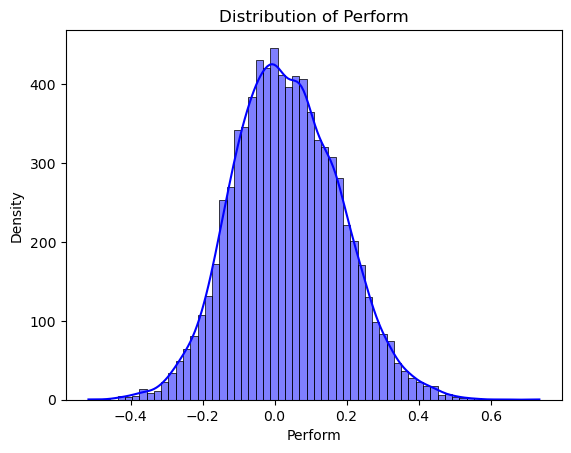

In [14]:
# Inspect the distribution of the Perform variable

# Plot histogram of the variable "Perform" with KDE curve
sns.histplot(data["Perform"], kde=True, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Perform')
plt.ylabel('Density')
plt.title('Distribution of Perform')

np.mean(data["Perform"]), np.var(data["Perform"])


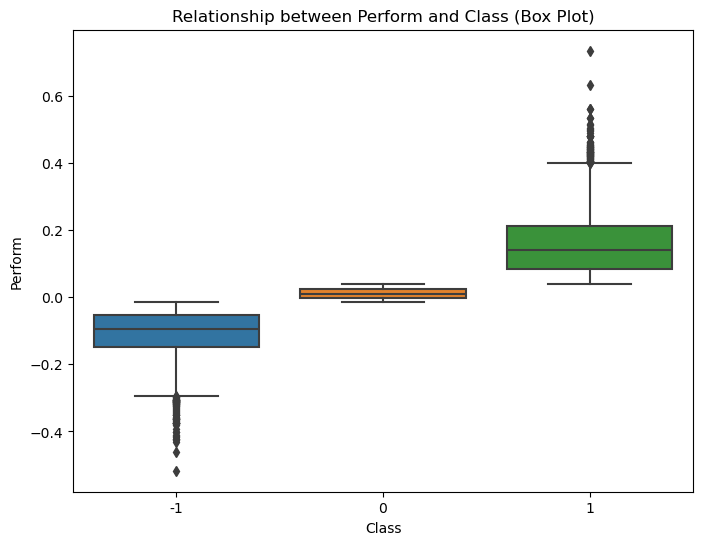

In [15]:
# Box Plot - Class vs Perform
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Perform', data=data)
plt.title('Relationship between Perform and Class (Box Plot)')
plt.xlabel('Class')
plt.ylabel('Perform')

plt.show()
# Observation: negative values: -1; around zero: 0; positive values: 1
# Next step: How well can the variable Perform predict Class?

c:\Users\Dell\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='variable', ylabel='value'>

c:\Users\Dell\anaconda3\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


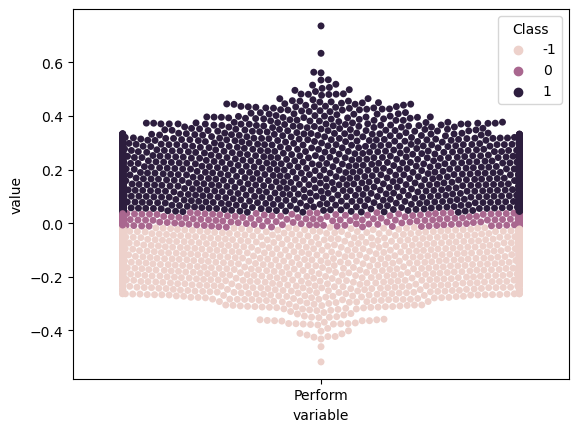

In [16]:
from seaborn import swarmplot

data_to_plot = pd.melt(data,
                       id_vars='Class',
                       value_vars=['Perform'],
                       value_name='value'
)

swarmplot(data=data_to_plot, x='variable', y='value', hue='Class')

In [17]:
missing_values_perform = data['Perform'].isnull().sum()

# Print the number of missing values
print("Missing values in 'Perform' column:", missing_values_perform)

Missing values in 'Perform' column: 0
The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [18]:
X = data["Perform"]
y = data["Class"] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(pd.DataFrame(X_train), y_train)

# Make predictions on the testing data
y_pred = clf.predict(pd.DataFrame(X_test))

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# An accuracy of 1 is achieved, stacking method can be considered

Accuracy: 1.0


# Univariate Analysis

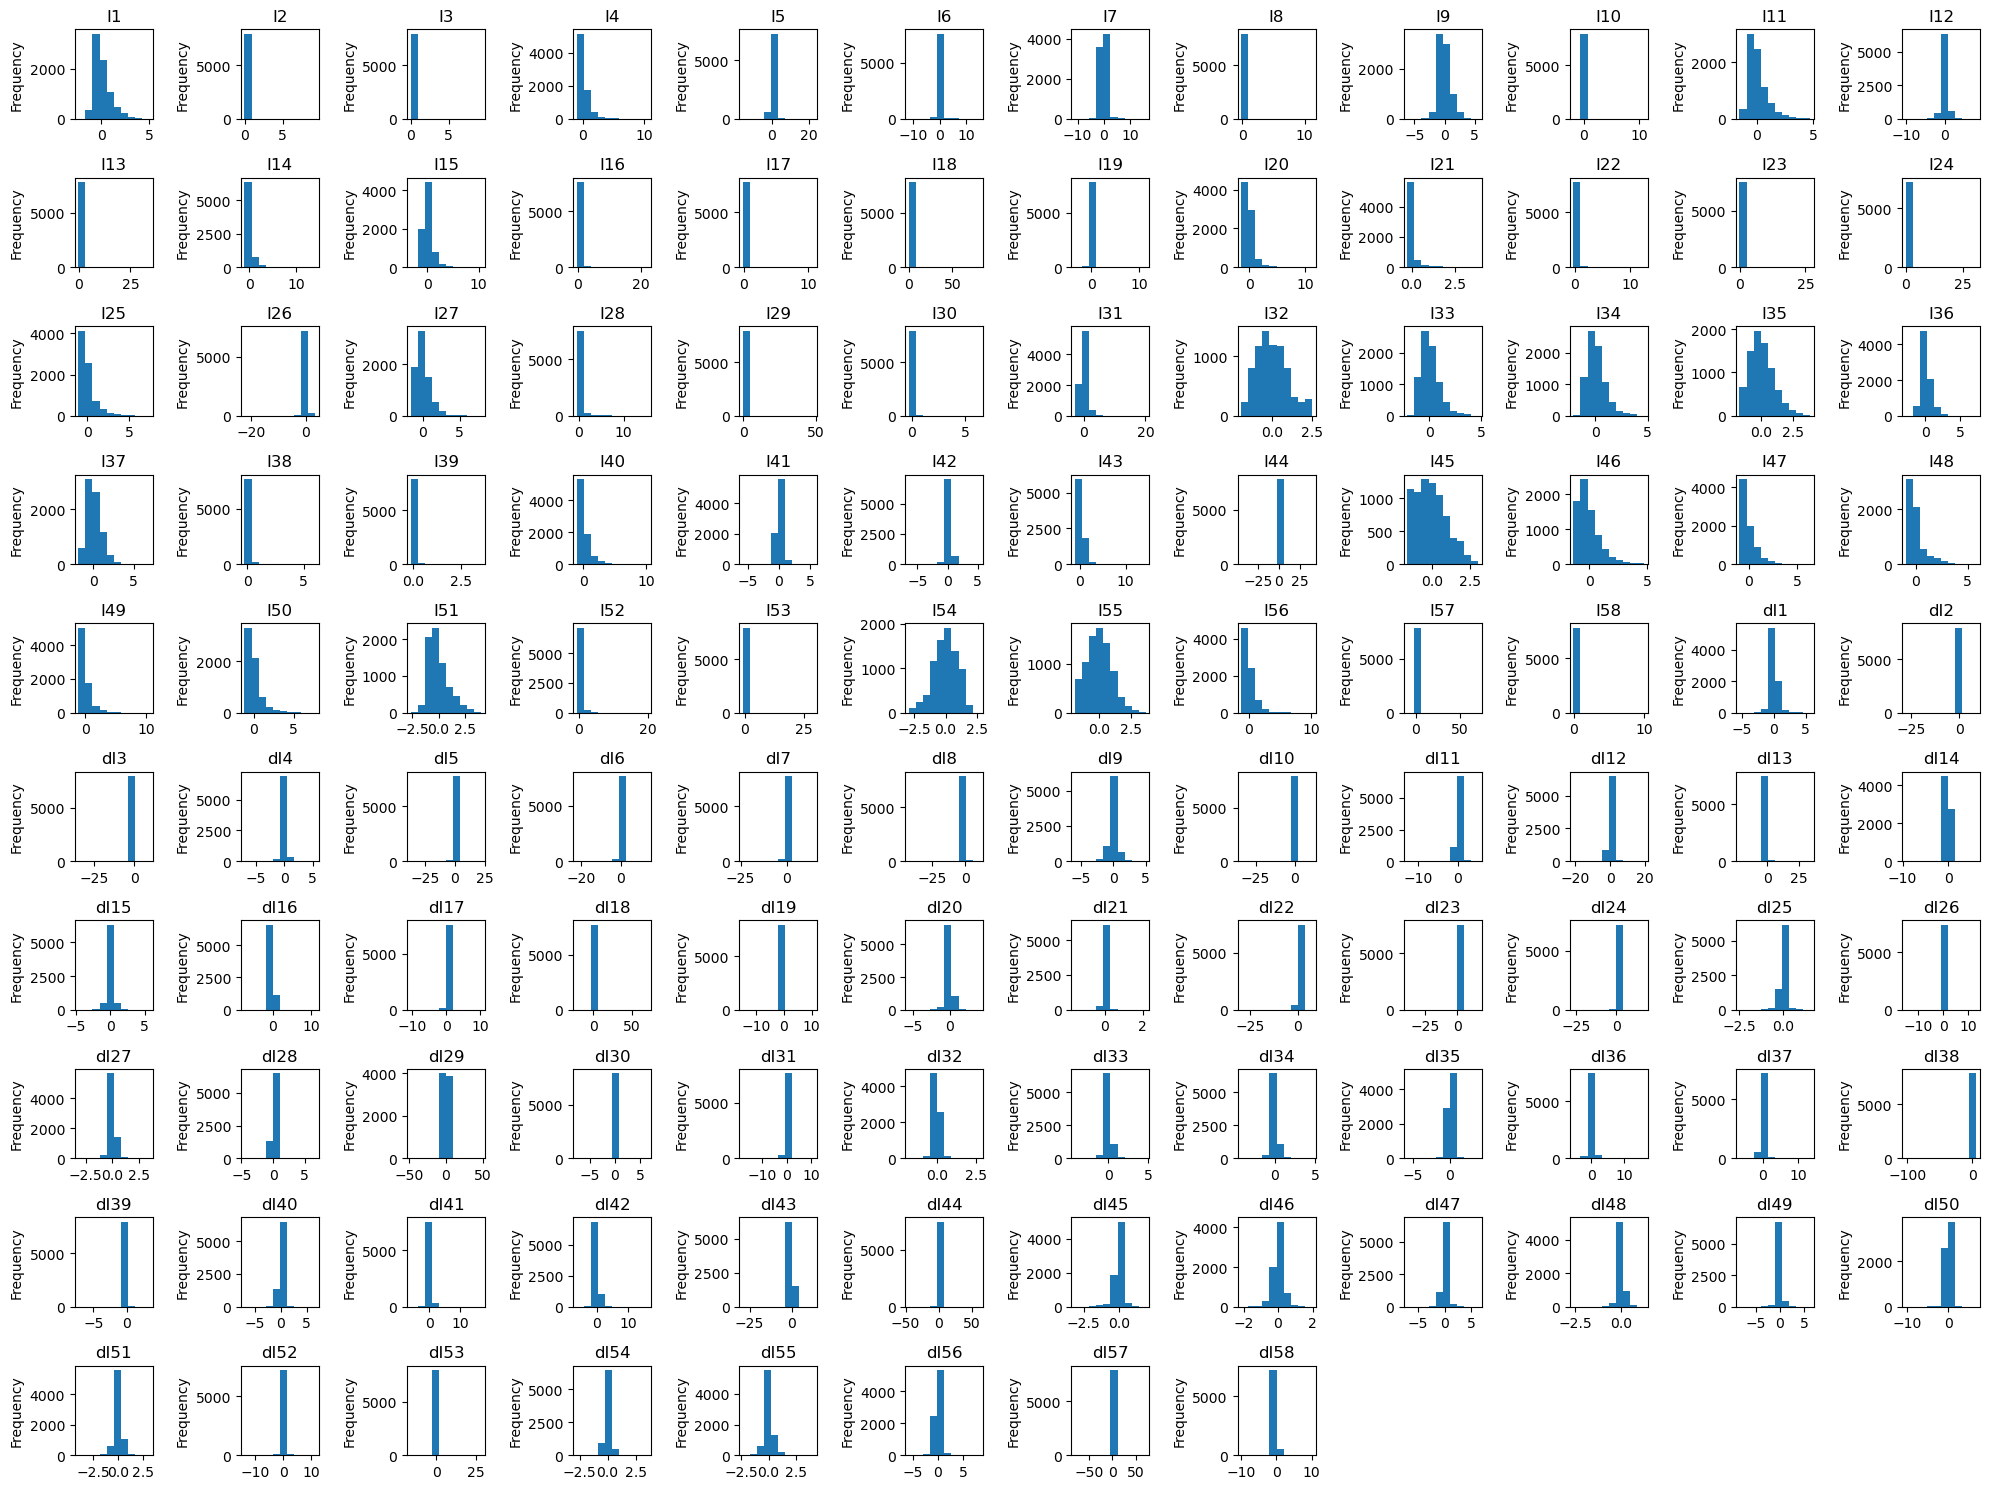

In [19]:
# Distributions of numerical features

# Create subplots with 10 rows and 12 columns
fig, axes = plt.subplots(nrows=10, ncols=12, figsize=(20, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each column in the DataFrame and plot its distribution
for i, col in enumerate(numerical_col):
    data[col].plot(kind='hist', ax=axes[i], title=col)

# Hide empty subplots
for i in range(len(numerical_col), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Observations: There are certain features display a higher variance, incl. I1, I9, I11, I25, I27, I32, I33, I34, I35, I37, I45, I46, I51, I54, I55
# Most of them are skewed; only a few seems symmetric, incl. I9, I32, I54

In [20]:
# Inspecting the feature variance

from sklearn.preprocessing import MinMaxScaler

# Standardize the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:-2])

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[1:-2])

# Calculate the variance for each standardized feature
variances = scaled_df.var()

# Display the variances
print(variances.sort_values(ascending=False))

# Observations: Those features at the end of the list display a relatively variance, maybe we can consider filtering them out from analysis by setting up some variance threshold


I32     0.047232
I45     0.045233
I55     0.030699
I35     0.028487
I54     0.028159
          ...   
dI10    0.000110
dI53    0.000109
dI8     0.000107
dI3     0.000106
dI57    0.000075
Length: 116, dtype: float64


Group
G2     1374
G4     1043
G6     1019
G1      880
G5      829
G9      753
G7      677
G8      585
G3      383
G11     297
G10     160
Name: count, dtype: int64
Industrials
Real Estate


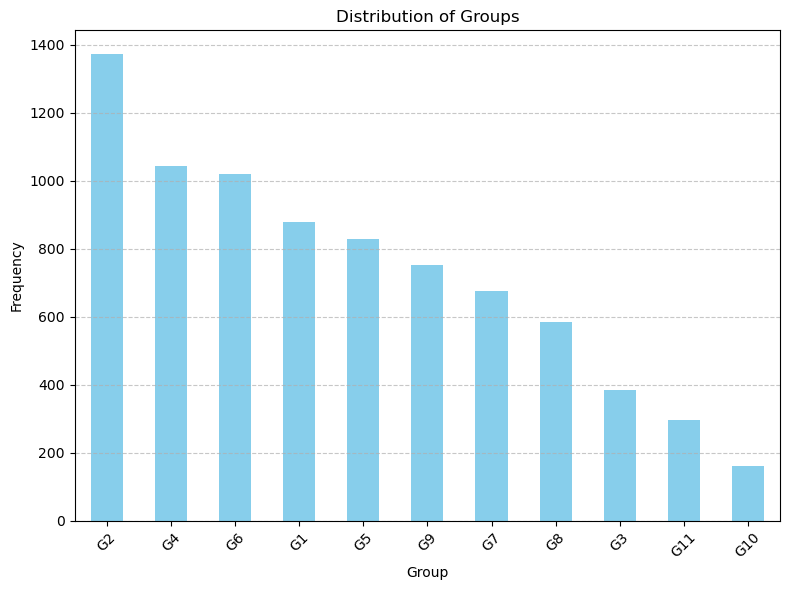

In [21]:
# Distribution of categorical features

group_counts = data['Group'].value_counts()
print(group_counts)
print(group_dict['G2'])
print(group_dict['G10'])

# Create a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
group_counts.plot(kind='bar', color='skyblue')  # Create the bar plot
plt.title('Distribution of Groups')  # Set the title of the plot
plt.xlabel('Group')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

# Observation: G2 has way more (7 times) observations than G10 for example, we need to do stratification, bootstrapping?

# Bivariate Analysis

In [22]:
# Numerical vs numerical

columns_for_analysis = list(numerical_col)
columns_for_analysis.append("Perform")

correlation_matrix = data.loc[:,columns_for_analysis].corr()
correlation_matrix

I1        I2        I3        I4        I5        I6        I7  \
I1       1.000000  0.154523  0.111331  0.628866 -0.104586  0.053769 -0.036570   
I2       0.154523  1.000000  0.981837  0.083077 -0.017656  0.006494 -0.015861   
I3       0.111331  0.981837  1.000000  0.060241 -0.012991 -0.002377 -0.020200   
I4       0.628866  0.083077  0.060241  1.000000 -0.102095  0.281641  0.012990   
I5      -0.104586 -0.017656 -0.012991 -0.102095  1.000000  0.472477  0.536551   
...           ...       ...       ...       ...       ...       ...       ...   
dI55    -0.045672  0.000196  0.004619  0.000969  0.016121 -0.019825 -0.021119   
dI56    -0.020502 -0.004624 -0.005272 -0.028395  0.047091  0.025895  0.057185   
dI57    -0.000272  0.004300  0.004182  0.027036  0.185563  0.075061  0.079441   
dI58    -0.011051 -0.002649 -0.002434 -0.008553 -0.018324 -0.018394 -0.023587   
Perform  0.032621  0.007575  0.005484  0.056906  0.013583  0.040215  0.018513   

               I8        I9       I10  ...      dI50      dI51      dI52  \
I1       0.111751  0.788159  0.174655  ...  0.053271  0.038002  0.014109   
I2       0.973780  0.126390  0.924900  ...  0.005813  0.006687  0.003214   
I3       0.985997  0.108152  0.863577  ...  0.004422  0.003088  0.001867   
I4       0.062366  0.539203  0.101547  ...  0.036164  0.023727  0.029496   
I5       0.015534  0.035382 -0.020563  ...  0.003839 -0.005814  0.012648   
...           ...       ...       ...  ...       ...       ...       ...   
dI55     0.001629 -0.023362 -0.010944  ...  0.194147  0.206994  0.137896   
dI56    -0.003398 -0.041486 -0.000641  ...  0.008907 -0.027052 -0.001166   
dI57     0.009775  0.028823  0.003520  ...  0.052461  0.087330  0.061952   
dI58    -0.006132 -0.043840 -0.002953  ... -0.001036  0.003029 -0.001507   
Perform  0.012971  0.076165  0.009557  ...  0.012726  0.025473  0.040004   

             dI53      dI54      dI55      dI56      dI57      dI58   Perform  
I1       0.030302 -0.062357 -0.045672 -0.020502 -0.000272 -0.011051  0.032621  
I2       0.153932  0.013210  0.000196 -0.004624  0.004300 -0.002649  0.007575  
I3       0.140017  0.022570  0.004619 -0.005272  0.004182 -0.002434  0.005484  
I4       0.011956  0.009868  0.000969 -0.028395  0.027036 -0.008553  0.056906  
I5      -0.001897  0.036091  0.016121  0.047091  0.185563 -0.018324  0.013583  
...           ...       ...       ...       ...       ...       ...       ...  
dI55     0.084510  0.631664  1.000000 -0.009540 -0.004289  0.018315  0.005571  
dI56    -0.014102 -0.119205 -0.009540  1.000000  0.031101  0.002030  0.002631  
dI57    -0.003021  0.001568 -0.004289  0.031101  1.000000 -0.025865  0.011386  
dI58    -0.000842 -0.007146  0.018315  0.002030 -0.025865  1.000000 -0.010063  
Perform -0.002332  0.003461  0.005571  0.002631  0.011386 -0.010063  1.000000  

[117 rows x 117 columns]

Perform    1.000000
I9         0.076165
I45        0.060845
dI47       0.059900
dI9        0.059677
I4         0.056906
I47        0.054045
I28        0.050027
I11        0.049479
I56        0.044981
Name: Perform, dtype: float64


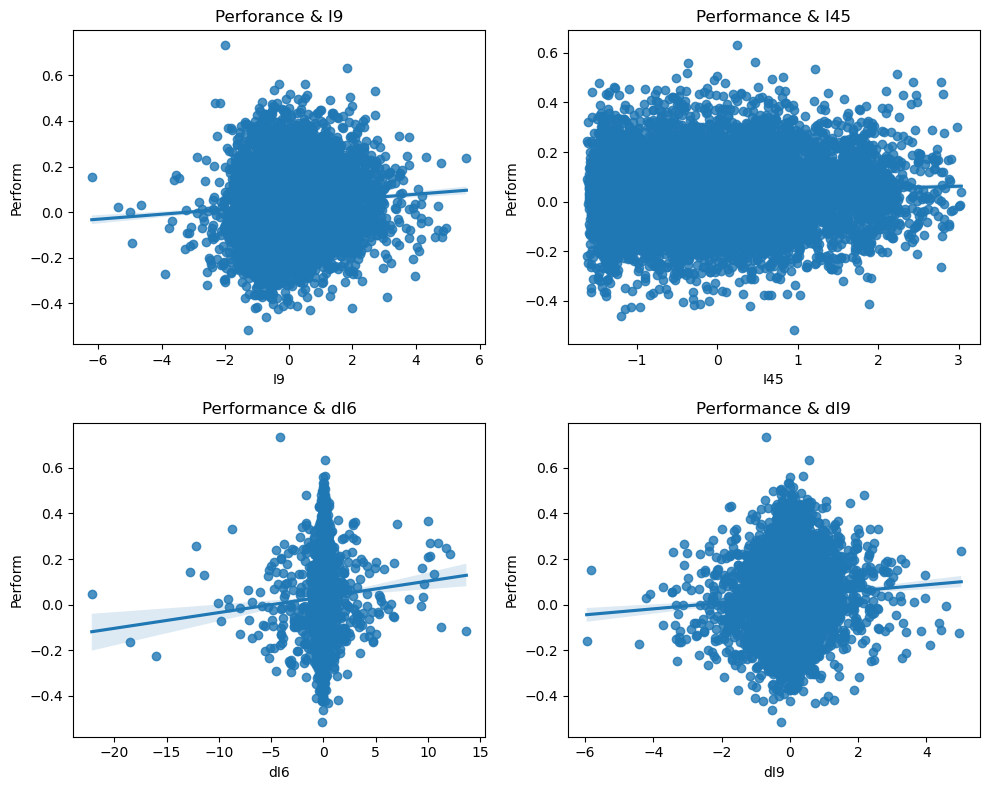

In [23]:
# 1. Features vs Perform

print(correlation_matrix["Perform"].abs().nlargest(n=10))

fig, axs = plt.subplots(2,2, figsize=(10,8))
sns.regplot(x = 'I9',y = 'Perform', data = data, ax=axs[0,0])
axs[0,0].set_title('Perforance & I9')

sns.regplot(x='I45', y='Perform', data=data, ax=axs[0,1])
axs[0,1].set_title('Performance & I45')

sns.regplot(x='dI6', y='Perform', data=data, ax=axs[1,0])
axs[1,0].set_title('Performance & dI6')

sns.regplot(x='dI9', y='Perform', data=data, ax=axs[1,1])
axs[1,1].set_title('Performance & dI9')

plt.tight_layout()
plt.show()

# Observation: Basically there is no correlation (linear dependence) between the numerical features and Perform

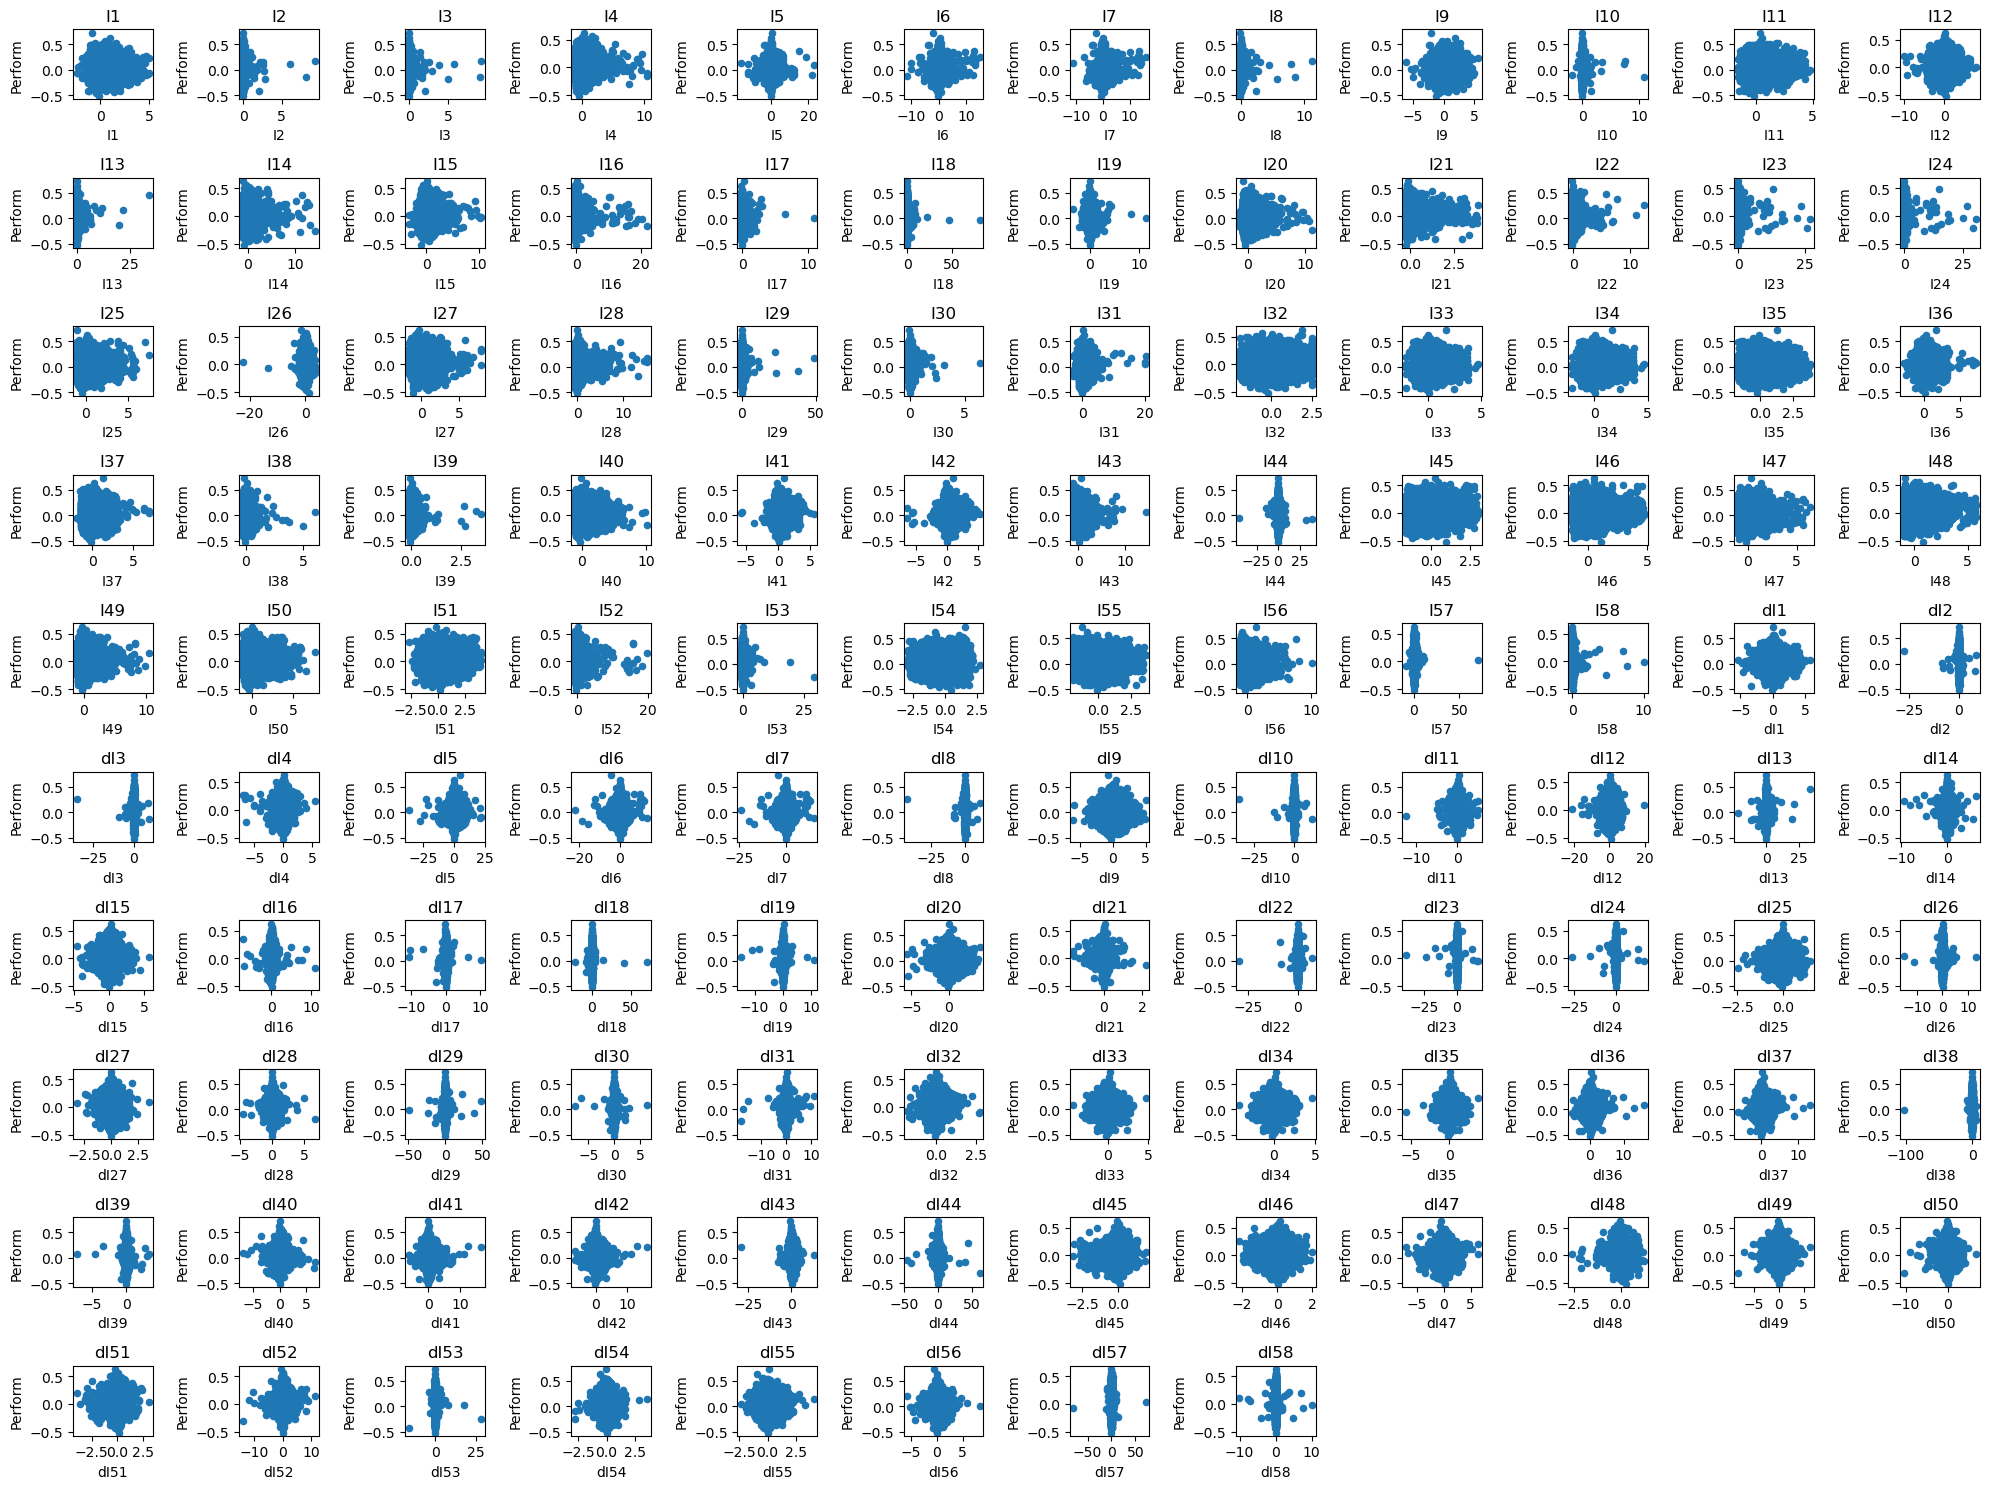

In [24]:
# Create subplots with 10 rows and 12 columns
fig, axes = plt.subplots(nrows=10, ncols=12, figsize=(20, 15))

# Flatten the axes array
axes = axes.flatten()

for i, col in enumerate(numerical_col):
    # Plot scatter plot for each column against the 'perform' variable
    data.plot.scatter(x=col, y='Perform', ax=axes[i], title=col)
                                   
# Hide empty subplots
for i in range(len(numerical_col), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Observations: Can't really transform most of the features here, but for some features, e.g. I20, I21, they display a complex relationship

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['G9', 'G5', 'G10', ..., 'G2', 'G4', 'G2'], dtype=object)

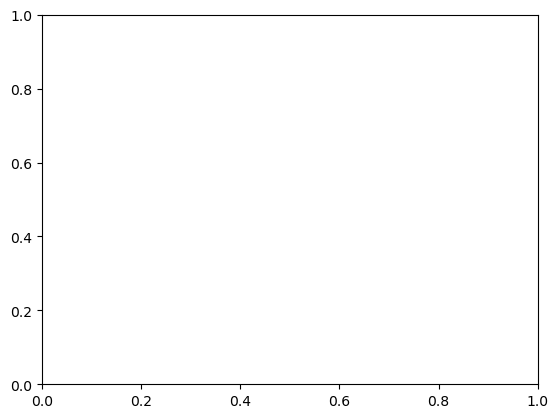

In [16]:
col = 'I16'

# Plot the scatter plot with sector names in the legend
data.plot.scatter(x=col, y='Perform', title=col,
                  c='Group', cmap='viridis', alpha=0.5, legend='auto')
plt.tick_params(axis='y', which='both', left=False, right=False)

plt.show()

plt.savefig('I16_group.pdf')

In [25]:
# 2. Numerical Features vs Numerical Features

threshold = 0.9

#for column in numerical_col:
    #print(correlation_matrix[column].abs().nlargest(n=5))

for column in numerical_col:
    # Get absolute correlation coefficients greater than or equal to the threshold
    high_correlations = correlation_matrix[column][correlation_matrix[column].abs() >= threshold]
    
    # Exclude the correlation of the column with itself
    high_correlations = high_correlations.drop(column)
    
    # Print the column name and the high correlation coefficients
    if not high_correlations.empty:
        print(f"High correlations for column '{column}':")
        print(high_correlations)
        print('\n')

"""
print(col_dict["I2"])
print(col_dict["I3"])
print(col_dict["I8"])
print(col_dict["I10"])
"""

# Observations: Those correlation coefficients shown below are very high (>= 0.9), we might consider dropping some of them

High correlations for column 'I2':
I3     0.981837
I8     0.973780
I10    0.924900
Name: I2, dtype: float64


High correlations for column 'I3':
I2    0.981837
I8    0.985997
Name: I3, dtype: float64


High correlations for column 'I8':
I2    0.973780
I3    0.985997
Name: I8, dtype: float64


High correlations for column 'I10':
I2    0.9249
Name: I10, dtype: float64


High correlations for column 'I18':
dI18    0.912955
Name: I18, dtype: float64


High correlations for column 'I23':
I24    0.966256
Name: I23, dtype: float64


High correlations for column 'I24':
I23    0.966256
Name: I24, dtype: float64


High correlations for column 'I33':
I34    1.0
Name: I33, dtype: float64


High correlations for column 'I34':
I33    1.0
Name: I34, dtype: float64


High correlations for column 'I35':
I37    0.904413
Name: I35, dtype: float64


High correlations for column 'I37':
I35    0.904413
Name: I37, dtype: float64


High correlations for column 'I49':
I50    0.903665
Name: I49, dtype: float64


'\nprint(col_dict["I2"])\nprint(col_dict["I3"])\nprint(col_dict["I8"])\nprint(col_dict["I10"])\n'

In [26]:
# Further investigate the variable pairs with correlation "1.0"

#data[["I33","I34"]]
#print(data["I33"].corr(data["I34"])) # 0.9999999999999998
# The correlation just got rounded up to 1.0.

print(col_dict["I33"], col_dict["I34"])
print(col_dict["dI33"], col_dict["dI34"])

# I expected the majority of Class would be -1 if I33 and I44 are negative, but it is not the case, in fact, it is the other way round
neg_I33 = data[["I33", "Class"]][data["I33"] < 0]
neg_I34 = data[["I34", "Class"]][data["I34"] < 0]

print(neg_I33["Class"].value_counts(), neg_I34["Class"].value_counts())

Operating Margin - %, TTM EBIT Margin - %, TTM
1-year Absolute Change of Operating Margin - %, TTM 1-year Absolute Change of EBIT Margin - %, TTM
Class
 1    2041
-1    1684
 0     603
Name: count, dtype: int64 Class
 1    2040
-1    1682
 0     603
Name: count, dtype: int64


**Definitions**:

 Operating Margin - %, TTM (Trailing Twelve Months): Operating Margin is a measure of how much profit a company makes on each dollar of revenue after accounting for the cost of goods sold (COGS) and operating expenses. It is calculated by dividing operating income (or operating profit) by revenue and expressing the result as a percentage. Operating Margin reflects the efficiency of a company's core business operations in generating profits.


EBIT (Earnings Before Interest and Taxes) Margin - %, TTM: EBIT Margin, also known as Profit Margin or Operating Profit Margin, is a measure of a company's profitability that shows how much profit it makes before considering the impact of interest and taxes. It is calculated by dividing EBIT by revenue and expressing the result as a percentage. EBIT Margin reflects the profitability of a company's operations without considering the effects of financial leverage (interest) and taxes.

**Reasons why they are highly correlated**:

Overlap in Components: Both Operating Margin and EBIT Margin are calculated using similar components, such as revenue and operating expenses. Since they share common elements in their calculations, they are likely to move together and have a high degree of correlation.

Similar Interpretation: While Operating Margin and EBIT Margin focus on slightly different aspects of profitability, they both provide insights into how efficiently a company is generating profits from its operations. Therefore, when a company's operations are performing well (resulting in high profitability), both metrics are likely to be high, leading to a strong positive correlation between them.

Text(0, 0.5, 'Perform')

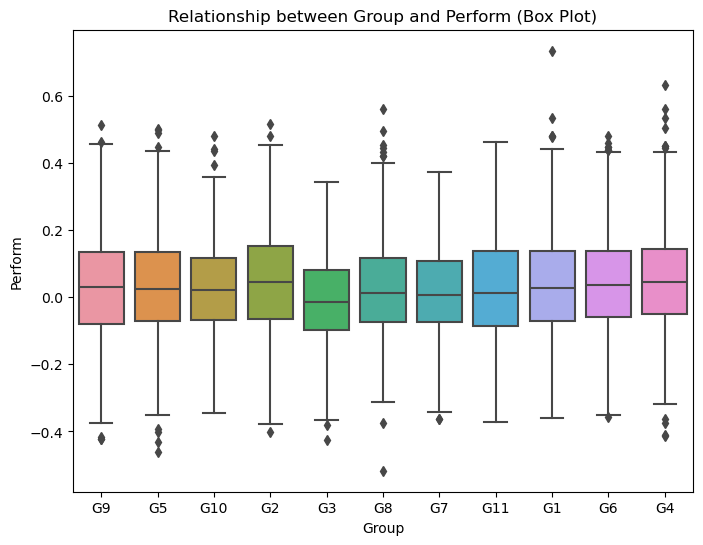

In [27]:
# Categorical vs Numerical - Groups vs Perform

# Box Plot for Groups vs Perform
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Perform', data=data)
plt.title('Relationship between Group and Perform (Box Plot)')
plt.xlabel('Group')
plt.ylabel('Perform')

# Observations: Both mean and variation across each group is pretty much the same
# G5, G8 and G4 have relatively more outliners, G1 (Financial) has a very extreme outliner


In [28]:
# Group names from above
print(group_dict["G5"])
print(group_dict["G8"])
print(group_dict["G4"])
print(group_dict["G1"])


Consumer Staples
Materials
Information Technology
Financials


In [29]:
"""
# Categorical vs Categorical - Group vs Class

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Group'], data['Class'])

print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test for independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the test results
print("\nChi-square statistic:", chi2)
print("P-value:", p_value)

# Conclusion: In this case, the extremely low p-value (much smaller than the typical significance level of 0.05) suggests strong evidence against the null hypothesis of independence. Therefore, we can conclude that there is a significant association between the "Group" and "Class" variables in the dataset.
# This indicates that the distribution of classes (e.g., -1, 0, 1) varies significantly across different groups in the dataset.
"""


'\n# Categorical vs Categorical - Group vs Class\n\nfrom scipy.stats import chi2_contingency\n\ncontingency_table = pd.crosstab(data[\'Group\'], data[\'Class\'])\n\nprint("Contingency Table:")\nprint(contingency_table)\n\n# Perform the chi-square test for independence\nchi2, p_value, dof, expected = chi2_contingency(contingency_table)\n\n# Display the test results\nprint("\nChi-square statistic:", chi2)\nprint("P-value:", p_value)\n\n# Conclusion: In this case, the extremely low p-value (much smaller than the typical significance level of 0.05) suggests strong evidence against the null hypothesis of independence. Therefore, we can conclude that there is a significant association between the "Group" and "Class" variables in the dataset.\n# This indicates that the distribution of classes (e.g., -1, 0, 1) varies significantly across different groups in the dataset.\n'

In [30]:
# Numerical vs Categorical - Numerical Features vs Class

summary_stats = data.groupby('Class')[numerical_col].agg(['mean', 'var', 'median', 'max', 'min'])
summary_stats

I1                                                I2            \
           mean       var    median       max       min      mean       var   
Class                                                                         
-1     0.043493  0.839340 -0.174239  4.986068 -2.432857 -0.015829  0.030916   
 0     0.051009  0.756861 -0.173490  4.179300 -1.437851 -0.015232  0.009561   
 1     0.104707  0.823348 -0.099075  5.013767 -2.289450 -0.011463  0.042075   

                                     ...      dI57                      \
         median       max       min  ...      mean       var    median   
Class                                ...                                 
-1    -0.030123  8.134698 -0.076729  ... -0.038115  2.395437 -0.002037   
 0    -0.030086  1.740999 -0.060721  ...  0.075480  4.731683  0.000694   
 1    -0.028948  9.338686 -0.072728  ...  0.015462  0.278017  0.002128   

                                 dI58                                 \
             max        min      mean       var    median        max   
Class                                                                  
-1     13.652225 -79.799539  0.006466  0.040592  0.001703   7.581309   
 0     71.825953  -2.188504  0.007306  0.109043  0.001377  10.114502   
 1      9.863539  -9.465287 -0.003925  0.085610  0.000127   7.153649   

                  
             min  
Class             
-1     -3.976595  
 0     -2.366736  
 1    -10.055223  

[3 rows x 580 columns]

C:\Users\Dell\AppData\Local\Temp\ipykernel_7128\1500665339.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_neg[col], color='blue', shade=False, ax=axes[i])
c:\Users\Dell\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_7128\1500665339.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_zero[col], color='red', shade=False, ax=axes[i])
c:\Users\Dell\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remov

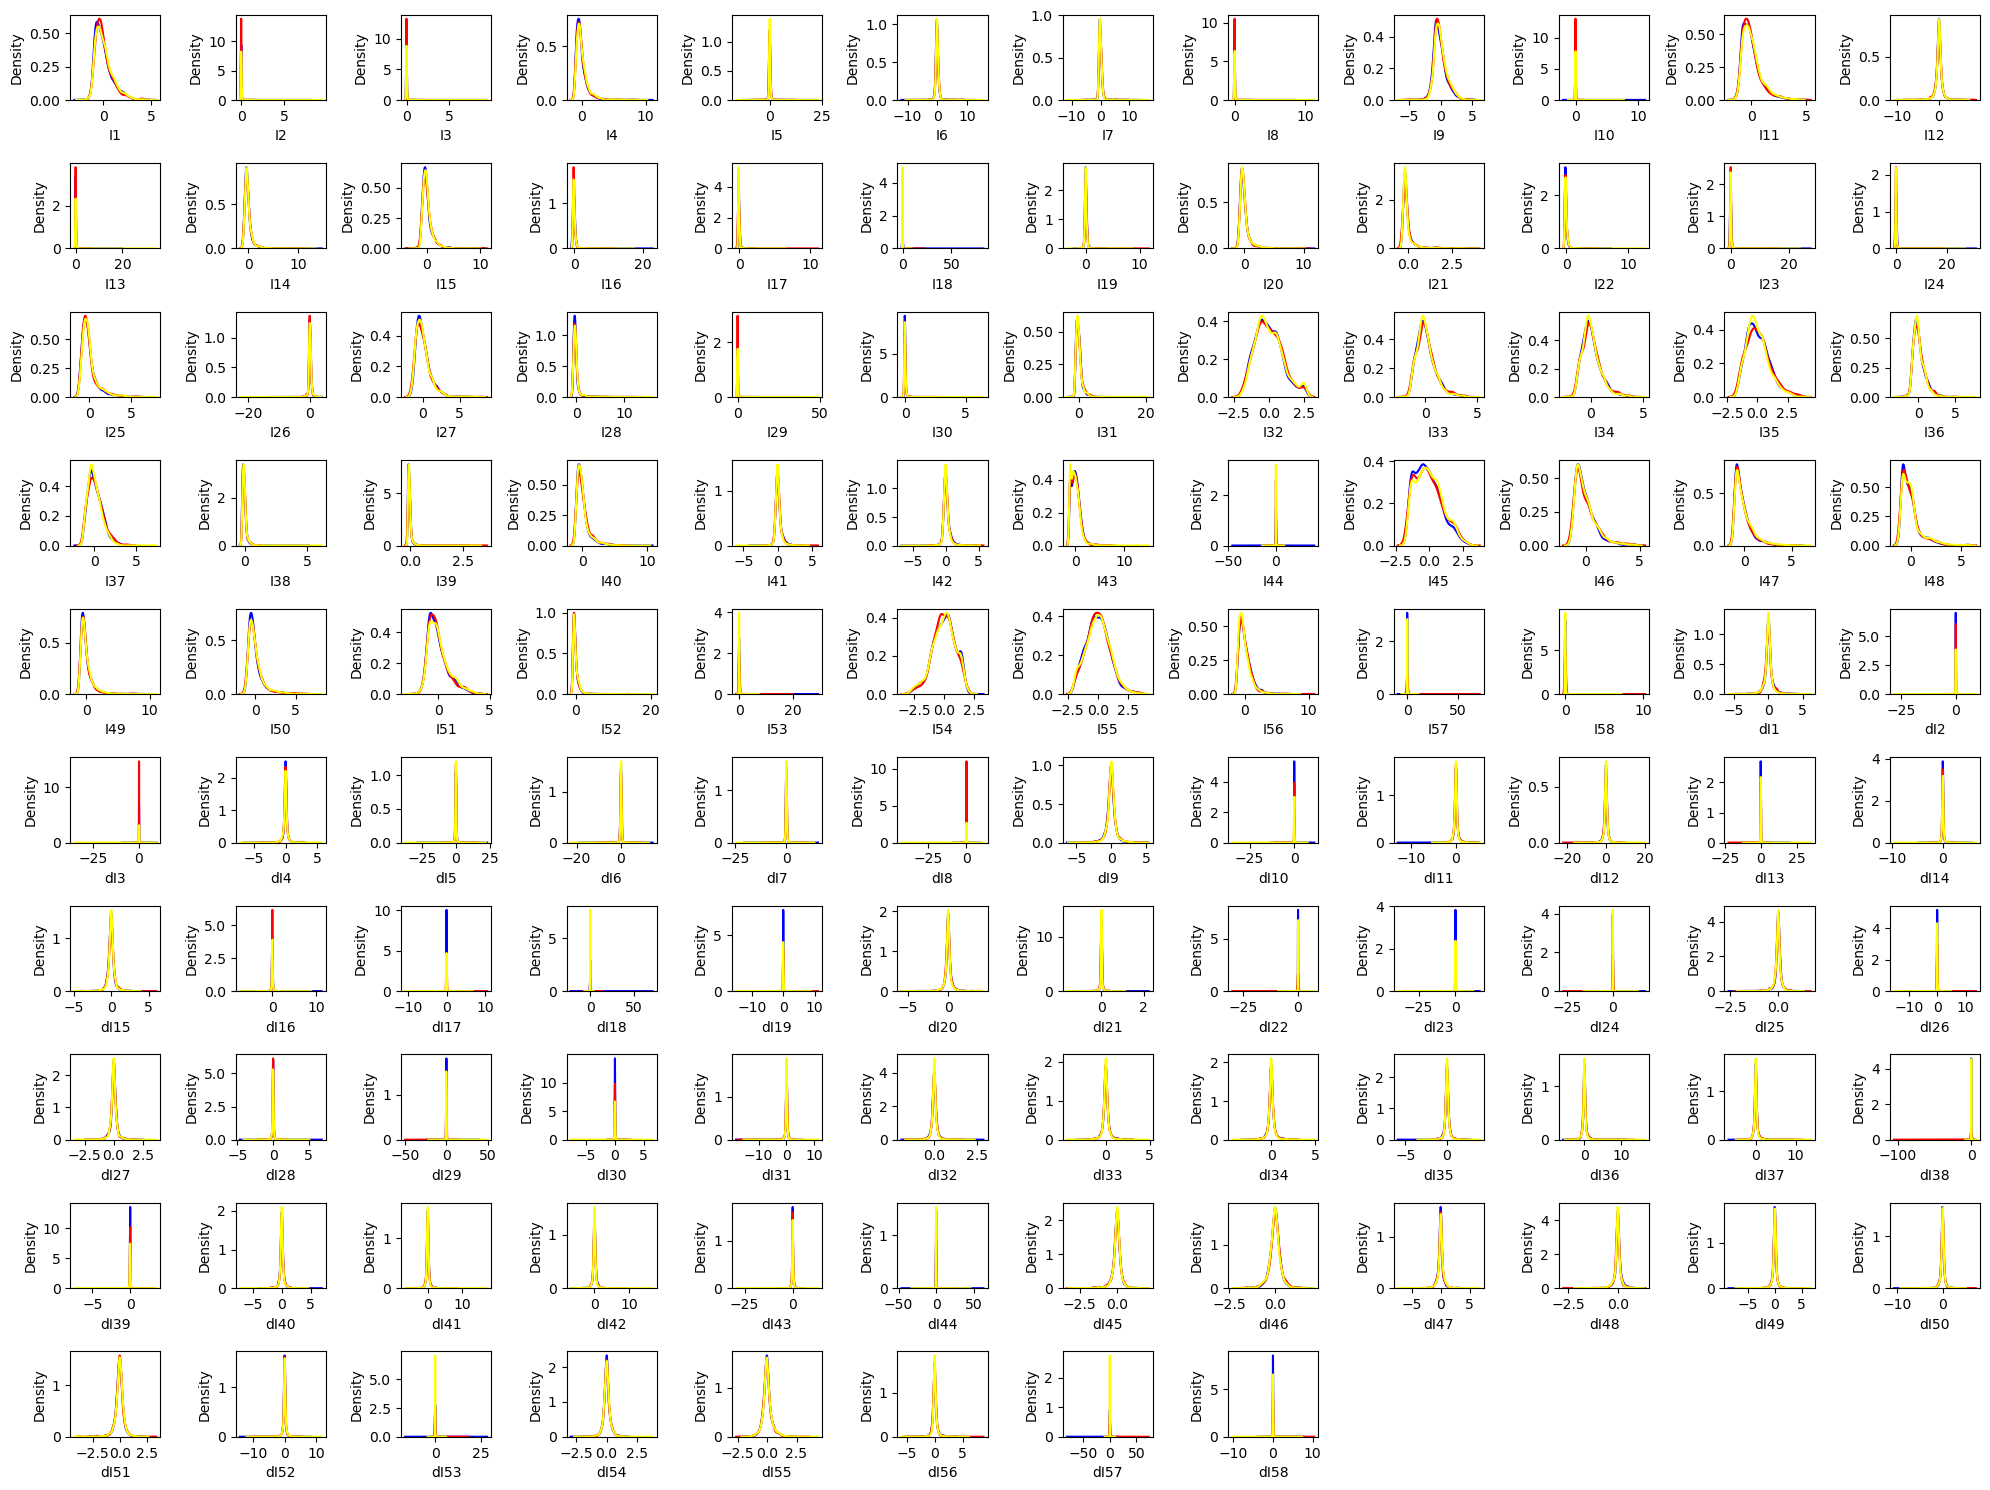

In [31]:
# Try to see how different the empirical distributions look like between groups

data_neg = data[data["Class"] == -1]
data_zero = data[data["Class"] == 0]
data_pos = data[data["Class"] == 1]

# Create subplots with 10 rows and 12 columns
fig, axes = plt.subplots(nrows=10, ncols=12, figsize=(20, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each column in the DataFrame and plot its distribution
for i, col in enumerate(numerical_col):
    sns.kdeplot(data_neg[col], color='blue', shade=False, ax=axes[i])
    sns.kdeplot(data_zero[col], color='red', shade=False, ax=axes[i])
    sns.kdeplot(data_pos[col], color='yellow', shade=False, ax=axes[i])

# Hide empty subplots
for i in range(len(numerical_col), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [32]:
# One-way ANOVA

from scipy.stats import f_oneway

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Column', 'p-value'])

# Select the data for the ANOVA test

# Iterate over each column in the DataFrames
for i, col in enumerate(numerical_col):
    group1 = data_neg[col]
    group2 = data_zero[col]
    group3 = data_pos[col]

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(group1, group2, group3)

    # Append the results to the DataFrame
    results_df.loc[len(results_df)] = [col, p_value]
    
alpha = 0.05

print(results_df[results_df['p-value'] <= alpha])
#print(len(results_df[results_df['p-value'] <= alpha])) # 11
print('\n')
print(variances.sort_values(ascending=False).head(20))
print('\n')
print(correlation_matrix["Perform"].abs().nlargest(n=10))

# Observations: 11 features with p-values less than 0.05, some p-values are missing because of the missing values in the dataset, e.g. I4

    Column       p-value
0       I1  1.377619e-02
8       I9  1.332993e-08
10     I11  5.777993e-04
18     I19  4.321163e-02
24     I25  6.345432e-03
34     I35  3.001545e-02
40     I41  2.623815e-02
46     I47  5.991597e-05
58     dI1  1.685997e-02
66     dI9  1.192927e-03
104   dI47  1.486146e-04


I32    0.047232
I45    0.045233
I55    0.030699
I35    0.028487
I54    0.028159
I46    0.025461
I51    0.022002
I48    0.020626
I11    0.018770
I33    0.016854
I34    0.016854
I47    0.015732
I1     0.014801
I25    0.012401
I50    0.011861
I27    0.010978
I37    0.009910
I21    0.009779
I40    0.008122
I56    0.007499
dtype: float64


Perform    1.000000
I9         0.076165
I45        0.060845
dI47       0.059900
dI9        0.059677
I4         0.056906
I47        0.054045
I28        0.050027
I11        0.049479
I56        0.044981
Name: Perform, dtype: float64


# Missing Values

In [33]:
data.loc[:,"I1":"I19"].head(14)

# Observation: Both empty strings and missing values are identified as NaN

I1        I2        I3        I4        I5        I6        I7  \
0   0.136495 -0.028429 -0.037772 -0.232459 -0.016222 -0.187506 -0.322545   
1  -0.714522 -0.042137 -0.052968 -0.796862 -0.018394  0.070102 -0.076321   
2   0.104791 -0.038188 -0.053191  0.620233  0.148587  0.489875  0.319274   
3  -0.532847 -0.006582 -0.023377  1.306702 -0.068909  0.048024 -0.119481   
4  -0.200815 -0.016334 -0.036754 -0.886675  0.484495 -1.148744  0.152517   
5   0.412335 -0.017345  0.000320 -0.172803  0.347920  0.653547  0.666238   
6   1.940864 -0.015633 -0.031934  0.978646 -0.143657 -0.060827 -0.207654   
7  -1.021855 -0.047040 -0.050712 -0.797356  0.182994  0.306398  0.506446   
8  -0.821333 -0.039547  0.008143 -0.759509 -0.303122 -0.378398 -0.039508   
9  -0.307516 -0.006634 -0.013441  1.112556 -0.567495 -0.164882 -0.310642   
10 -0.448898 -0.032152 -0.046113 -0.385375  0.240720 -0.104108 -0.334163   
11 -0.176154 -0.002824 -0.019954  0.500028 -0.255117  0.092953 -0.055498   
12 -0.465637 -0.038744 -0.041870 -0.665732 -0.113464 -0.309662 -0.481829   
13 -0.931870 -0.039772 -0.052957       NaN  2.794369  0.509472  0.409639   

          I8        I9       I10       I11       I12       I13       I14  \
0  -0.043743  0.125389 -0.014757 -0.033105  0.303035 -0.093811 -0.598917   
1  -0.063864 -1.045521 -0.037353 -0.792515 -1.082483  0.025798 -0.833652   
2  -0.060246  0.053174 -0.025008 -0.456840  1.284450 -0.133470  3.207672   
3  -0.021057 -1.012916 -0.011783  1.206727  0.311773 -0.005928  3.869459   
4  -0.043580 -0.935537 -0.023262 -0.908986 -0.525121  0.015492 -0.347325   
5   0.017413  1.650159 -0.005213  0.339804  0.347760 -0.070356 -0.121391   
6  -0.039914  1.595729 -0.021885  1.374136  0.095420  0.011105  0.532494   
7  -0.060148 -0.824667 -0.050888 -0.837533 -0.089082  4.826689 -0.136154   
8  -0.001078 -0.758472 -0.044428 -0.588309  0.084899  0.172256 -0.428986   
9  -0.015450 -0.686575 -0.005155  0.252850  0.168302 -0.028614 -0.896272   
10 -0.055549 -1.011588 -0.026152 -0.646737  0.259195 -0.034733 -0.925928   
11 -0.020200 -0.617401 -0.013535  1.565704  0.542356  0.007545  6.524087   
12 -0.041480 -0.146848 -0.033977 -0.661406 -0.024302 -0.003577  0.094093   
13 -0.060682 -1.510078 -0.029708 -0.402698       NaN -0.094075       NaN   

         I15       I16       I17       I18       I19  
0  -0.271292 -0.256749 -0.100146 -0.045525 -0.078422  
1  -0.625088 -0.333608  0.072579 -0.046963  0.223022  
2   2.373230  1.304427       NaN       NaN -0.361293  
3  -1.064793  0.107702 -0.126984 -0.044360 -0.181023  
4   0.296360 -0.242201  0.120049 -0.048293  0.290658  
5   2.683838 -0.030689 -0.106058 -0.045228 -0.091069  
6   1.263629 -0.296195 -0.143954 -0.045710 -0.134969  
7   0.241308 -0.245636  0.123161 -0.047294  0.293047  
8  -0.442555 -0.106882  0.103365 -0.047443  0.232813  
9  -0.945823  0.234113 -0.052650 -0.046788 -0.114702  
10 -0.991223 -0.200290 -0.003814 -0.046680  0.064800  
11 -1.000062 -0.159350 -0.115586 -0.045681 -0.143850  
12 -0.120637 -0.301700 -0.025865 -0.046857  0.036871  
13       NaN       NaN  0.557623 -0.047092  0.524995

In [34]:
# Number of rows with missing values
data.isna().any(axis=1).sum()

2806

In [12]:
missing_values_count = data[numerical_col].isna().sum()
empty_values_count = missing_values_count - data2[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

Feature  Total_Missing  Empty
0        I1              0      0
1        I2              0      0
2        I3              0      0
3        I4            525      2
4        I5              5      5
..      ...            ...    ...
111    dI54              0      0
112    dI55            170     30
113    dI56             20     20
114    dI57            135     18
115    dI58            249    210

[116 rows x 3 columns]

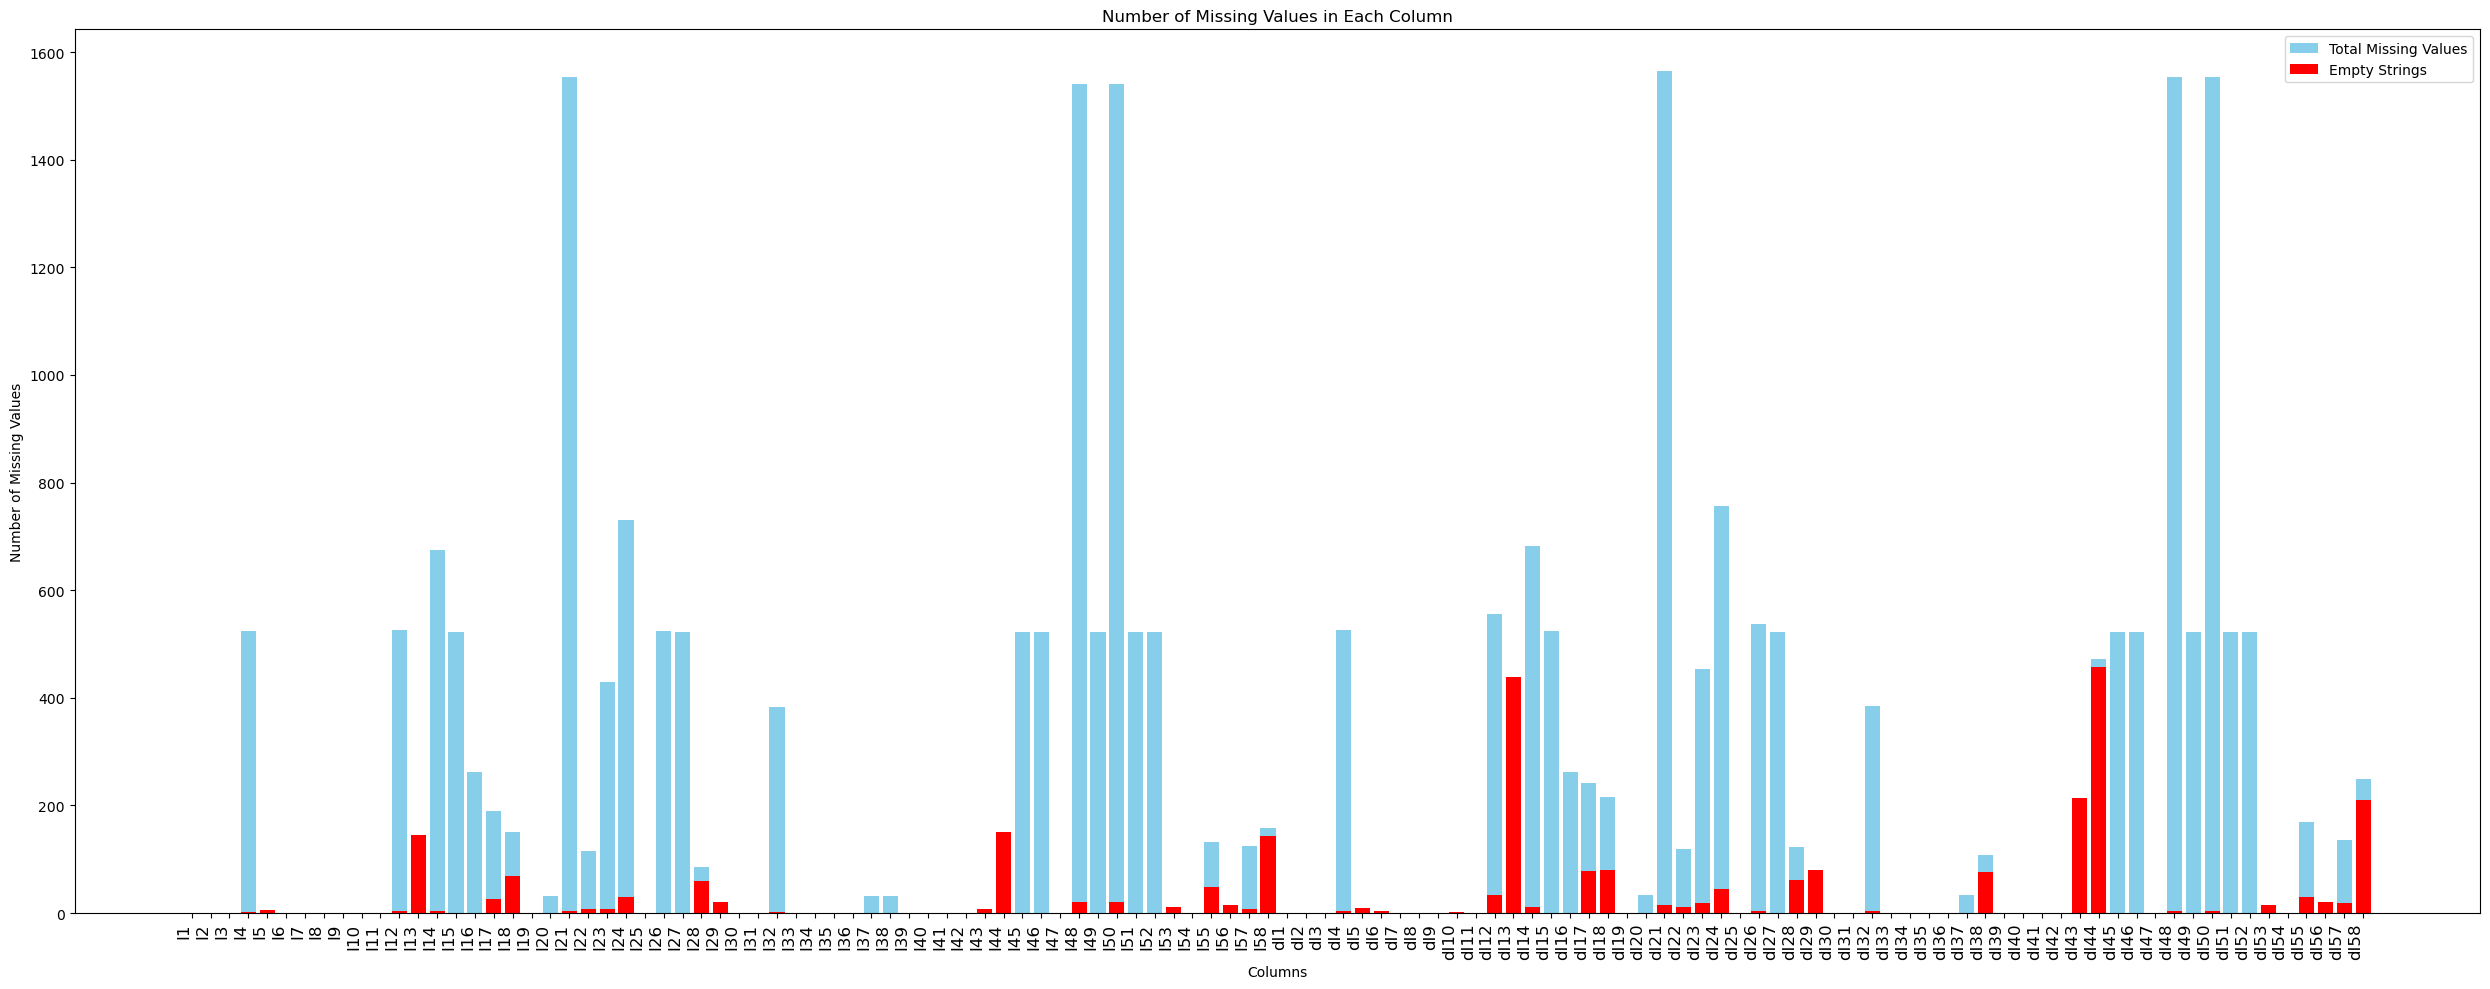

<Figure size 640x480 with 0 Axes>

In [18]:
# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()
plt.savefig('missing.jpeg')

# Observations: 1. The number of missing values is not uniform distributed across features, some features display a significantly high number of missing values (not MCAR)
# 2. The number of empty strings across features is not uniform distributed either, but it looks slightly more uniform than that of the total number of missing values


#### Missing values empty and all barplots groupwise

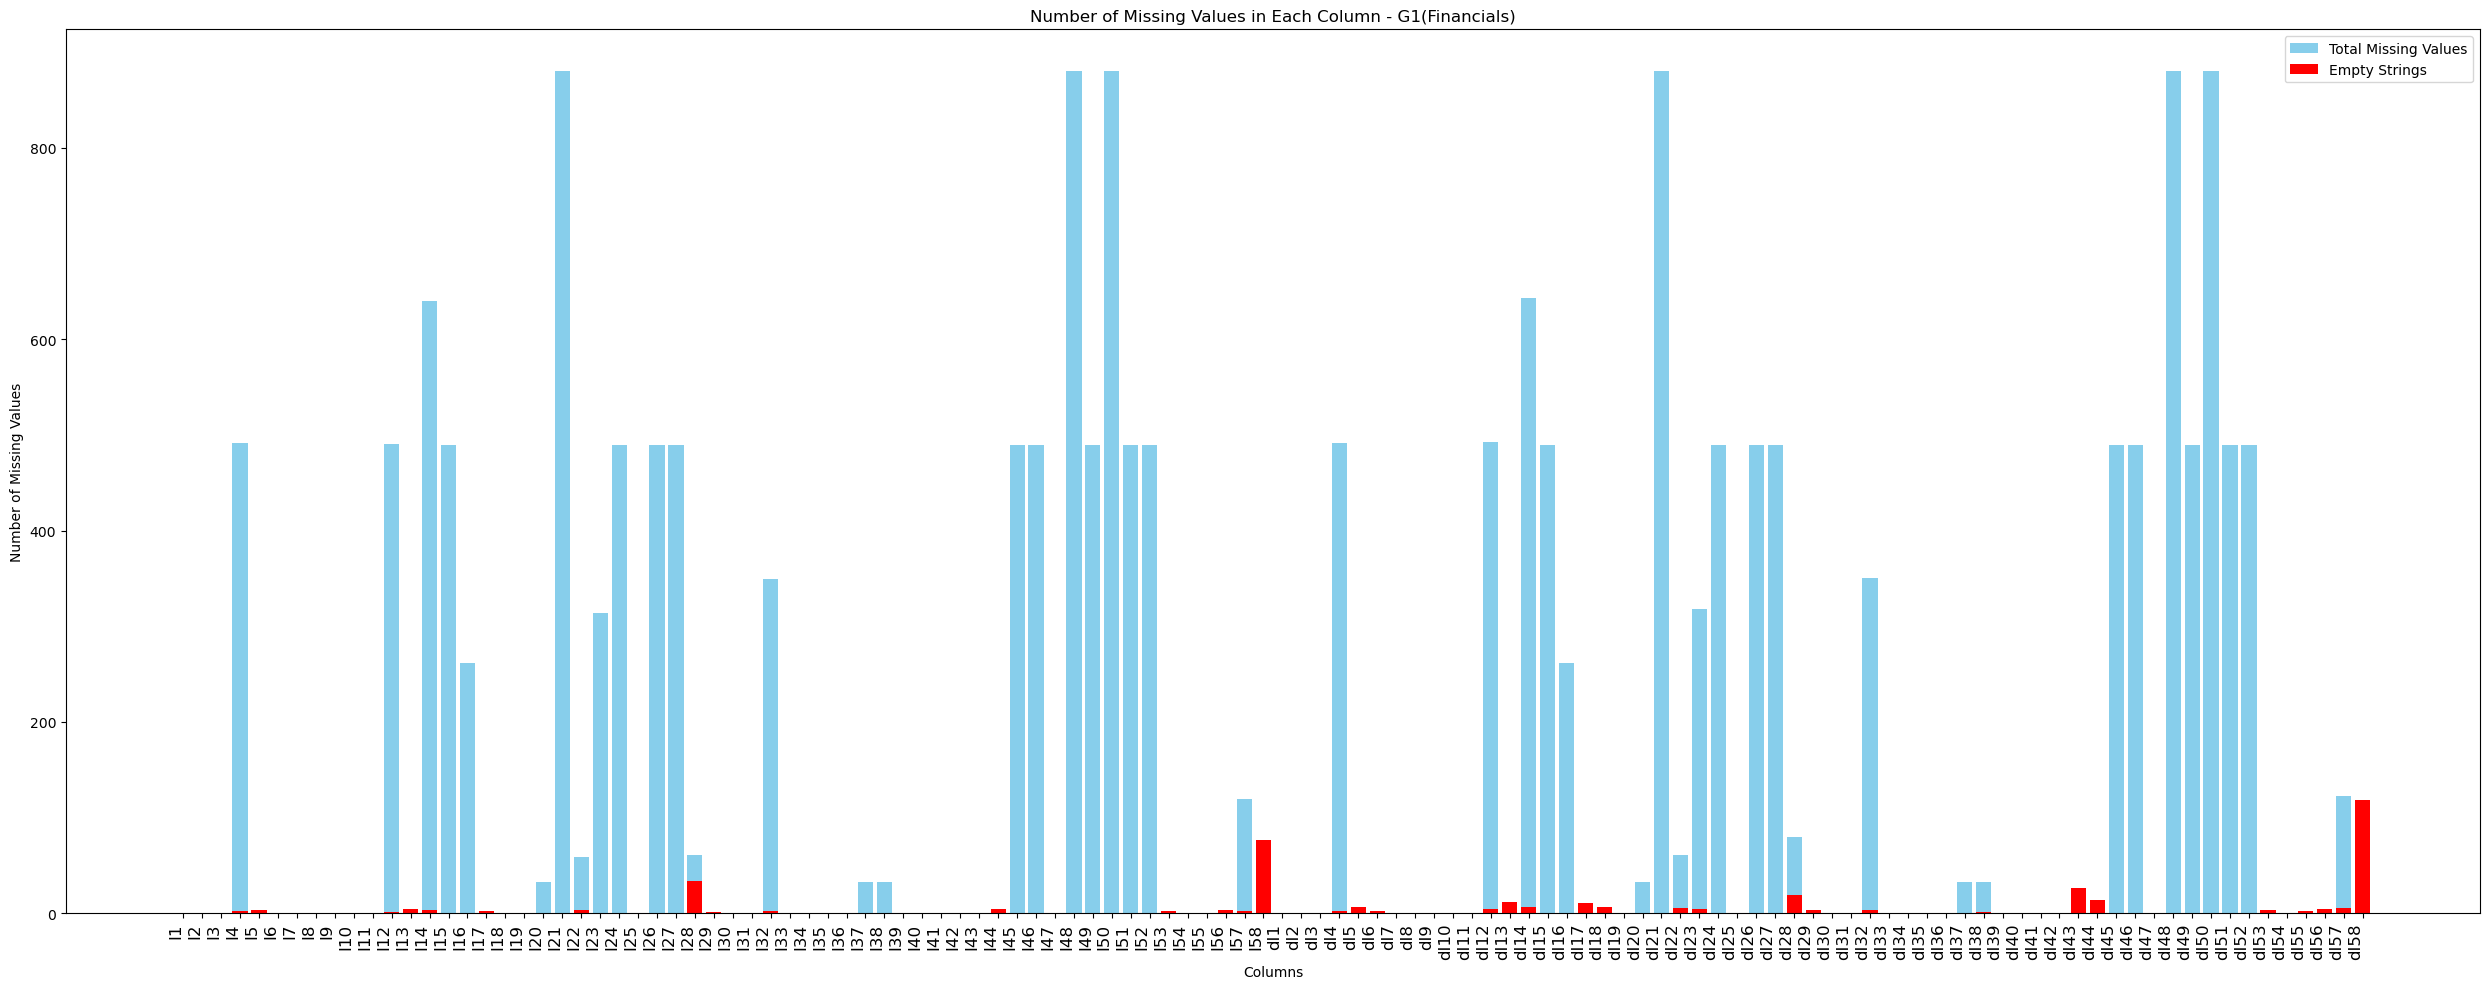

In [29]:
dataG1 = data.loc[data['Group'] == 'G1']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G1']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column - G1('+ group_dict['G1'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

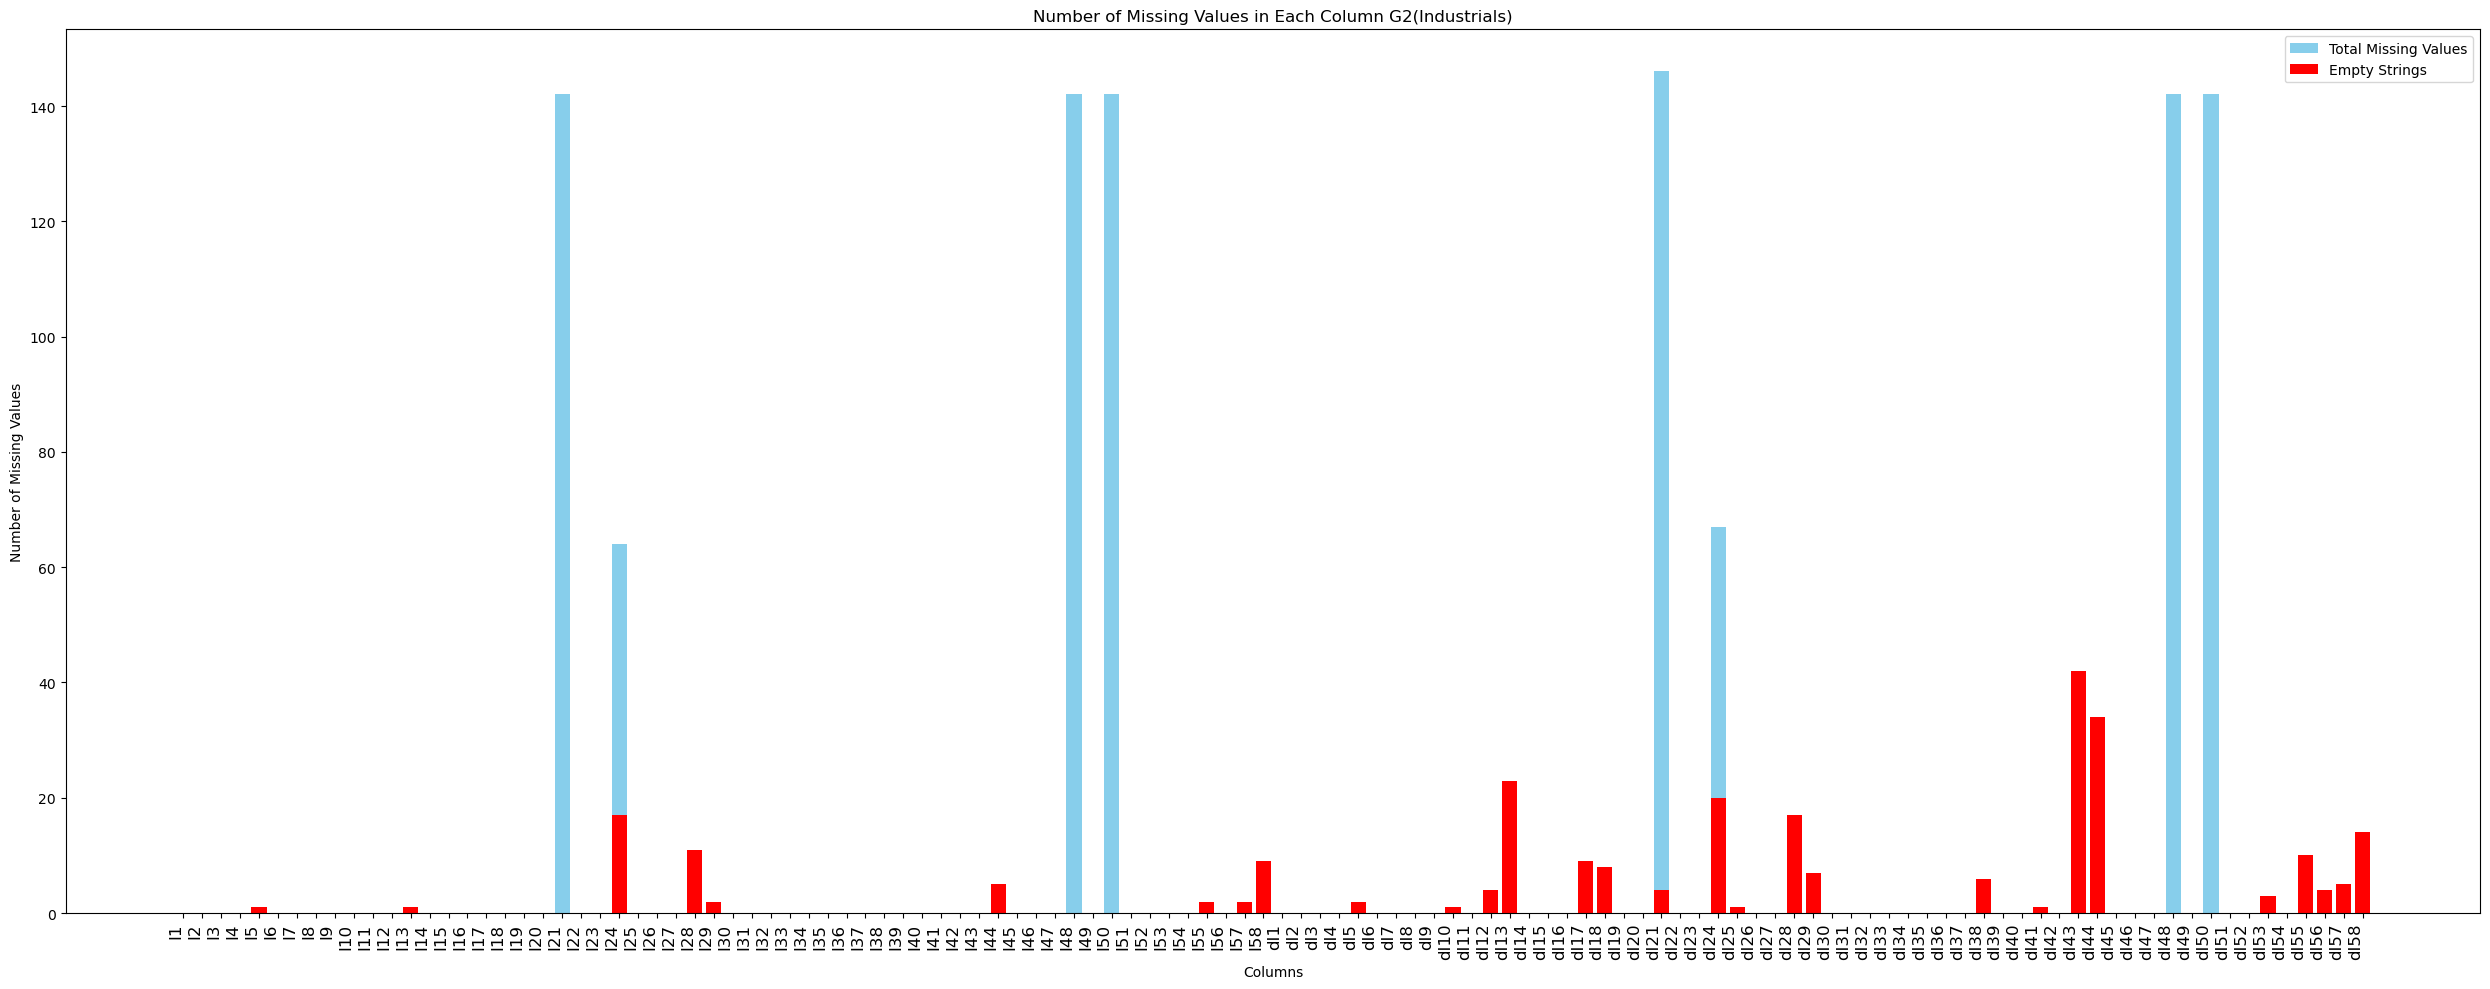

In [31]:
dataG1 = data.loc[data['Group'] == 'G2']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G2']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column G2('+ group_dict['G2'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

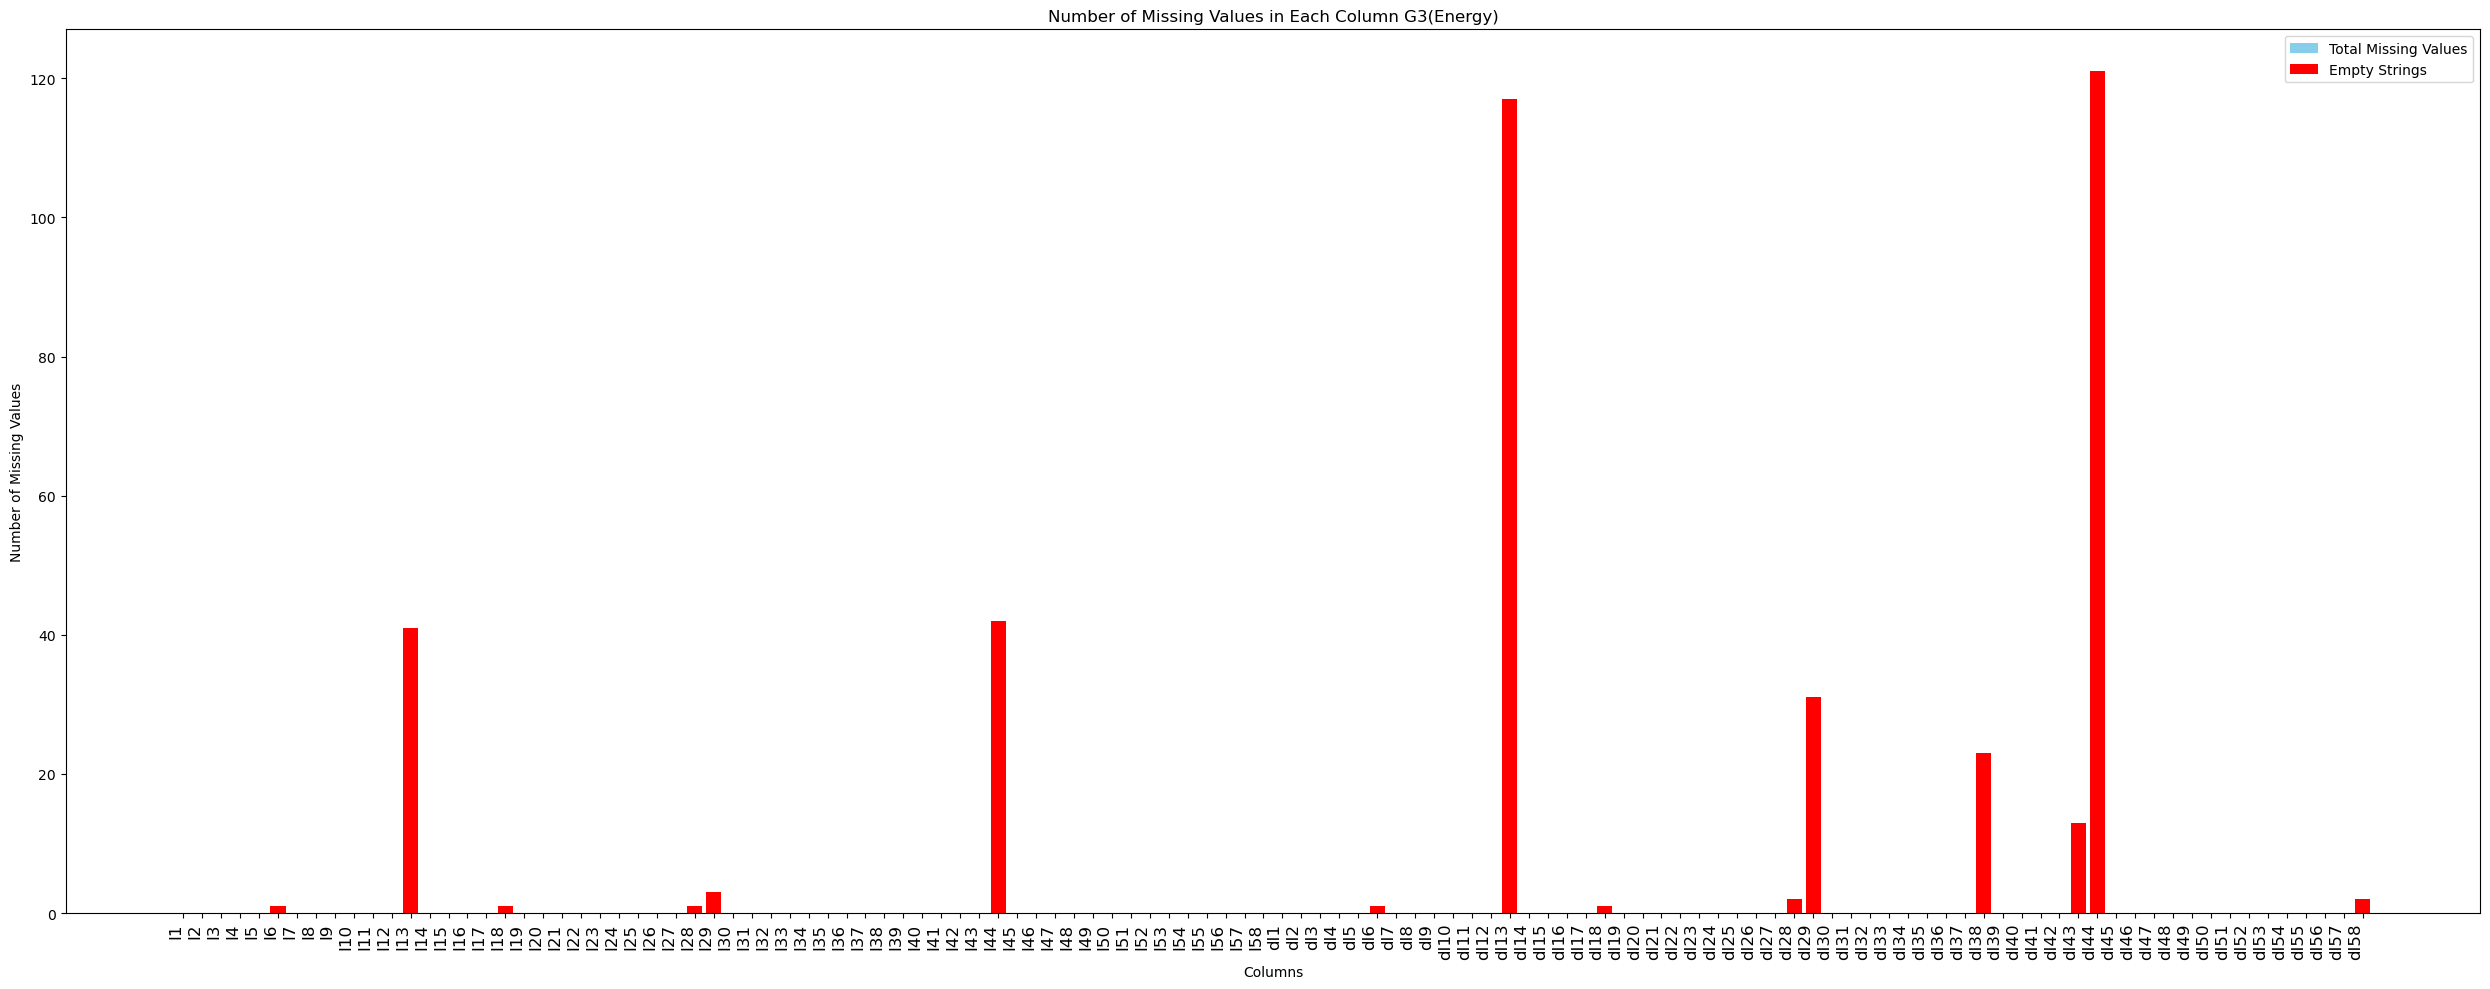

In [32]:
dataG1 = data.loc[data['Group'] == 'G3']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G3']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column G3('+ group_dict['G3'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

In [52]:
(col_dict['I13'],col_dict['I44'])

('Dividend Payout Ratio - %, TTM', 'PE Growth Ratio, TTM')

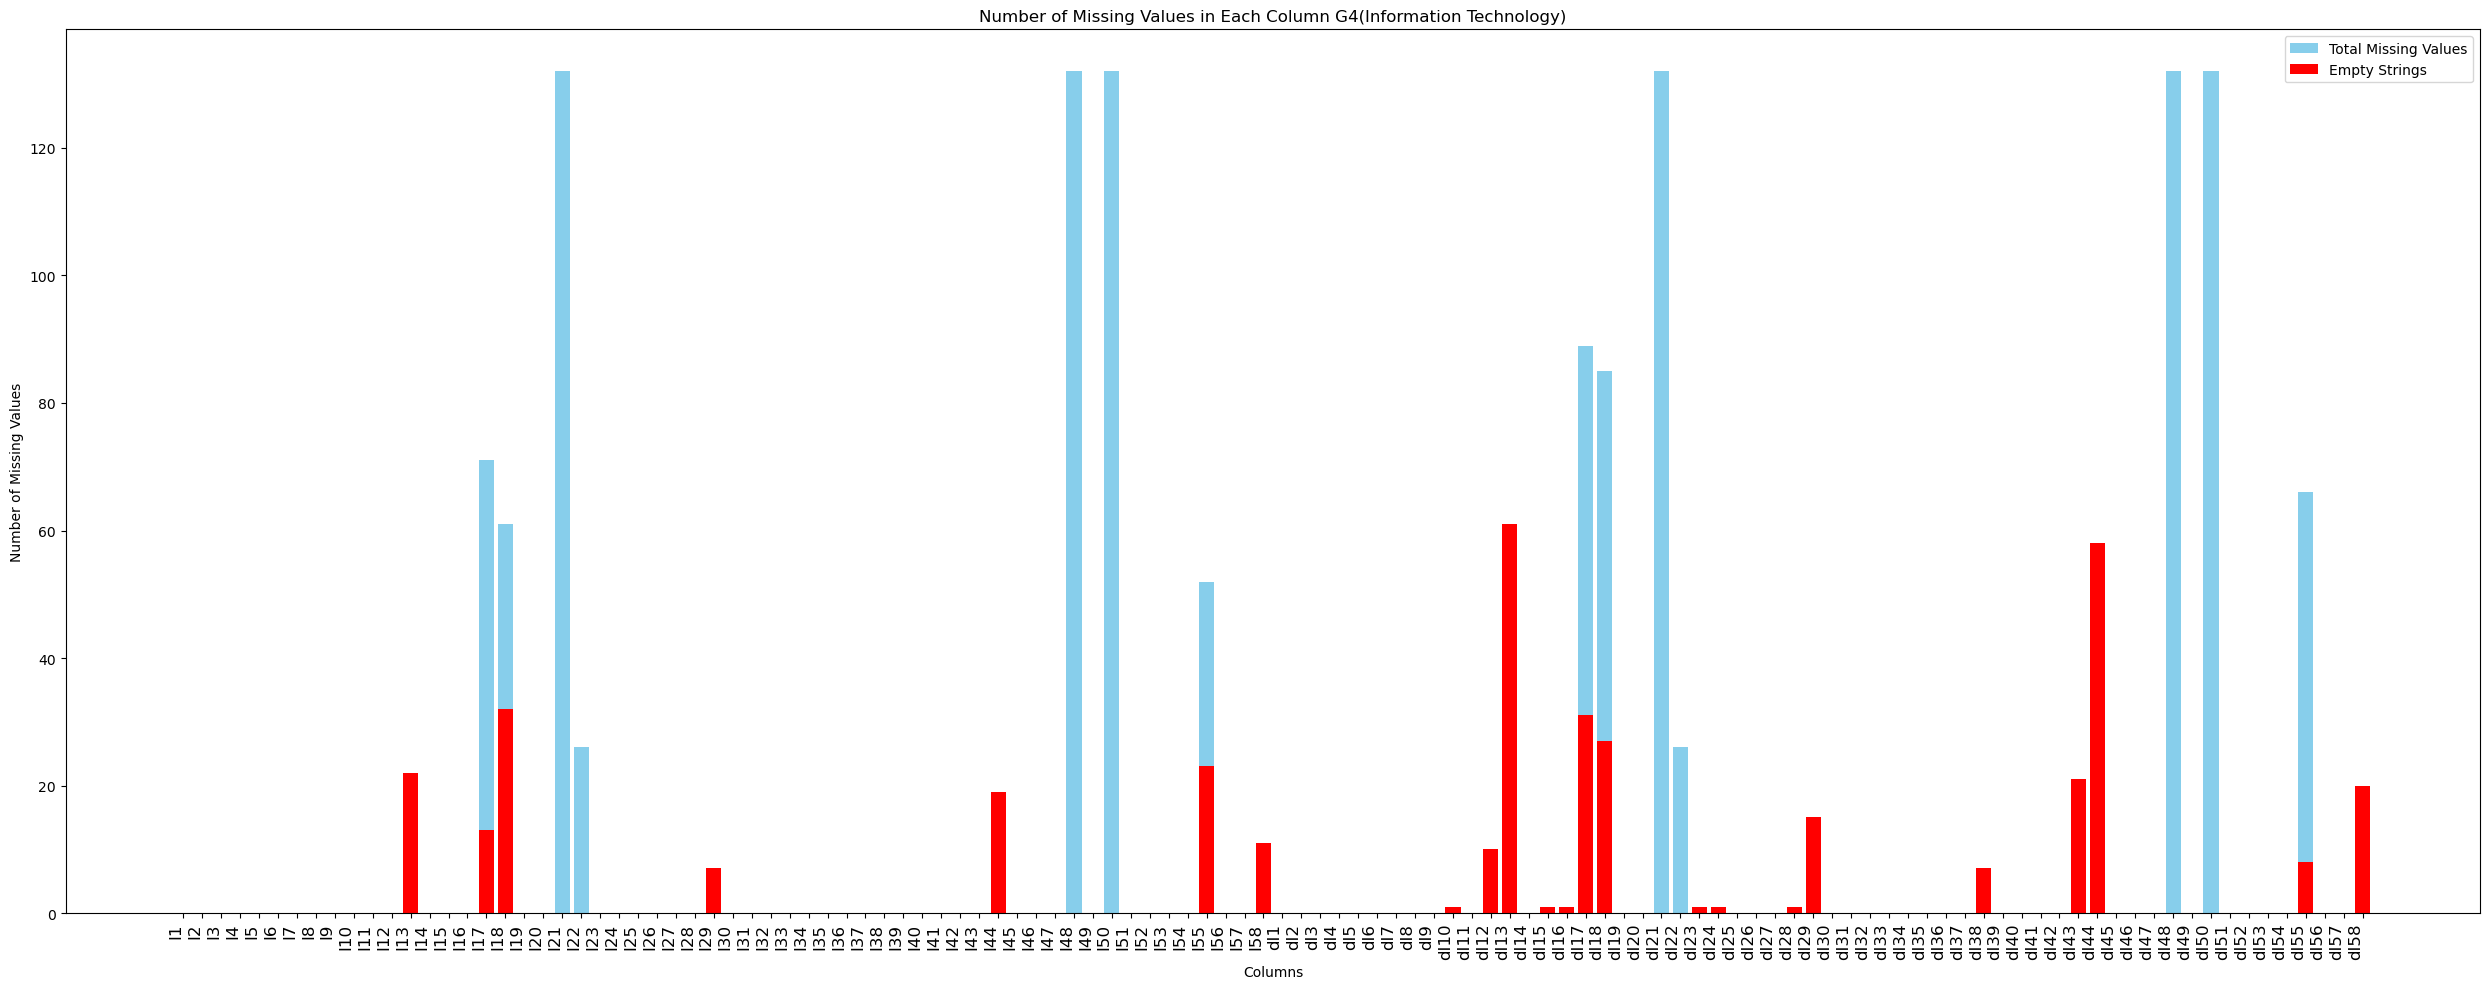

In [33]:
dataG1 = data.loc[data['Group'] == 'G4']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G4']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column G4('+ group_dict['G4'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

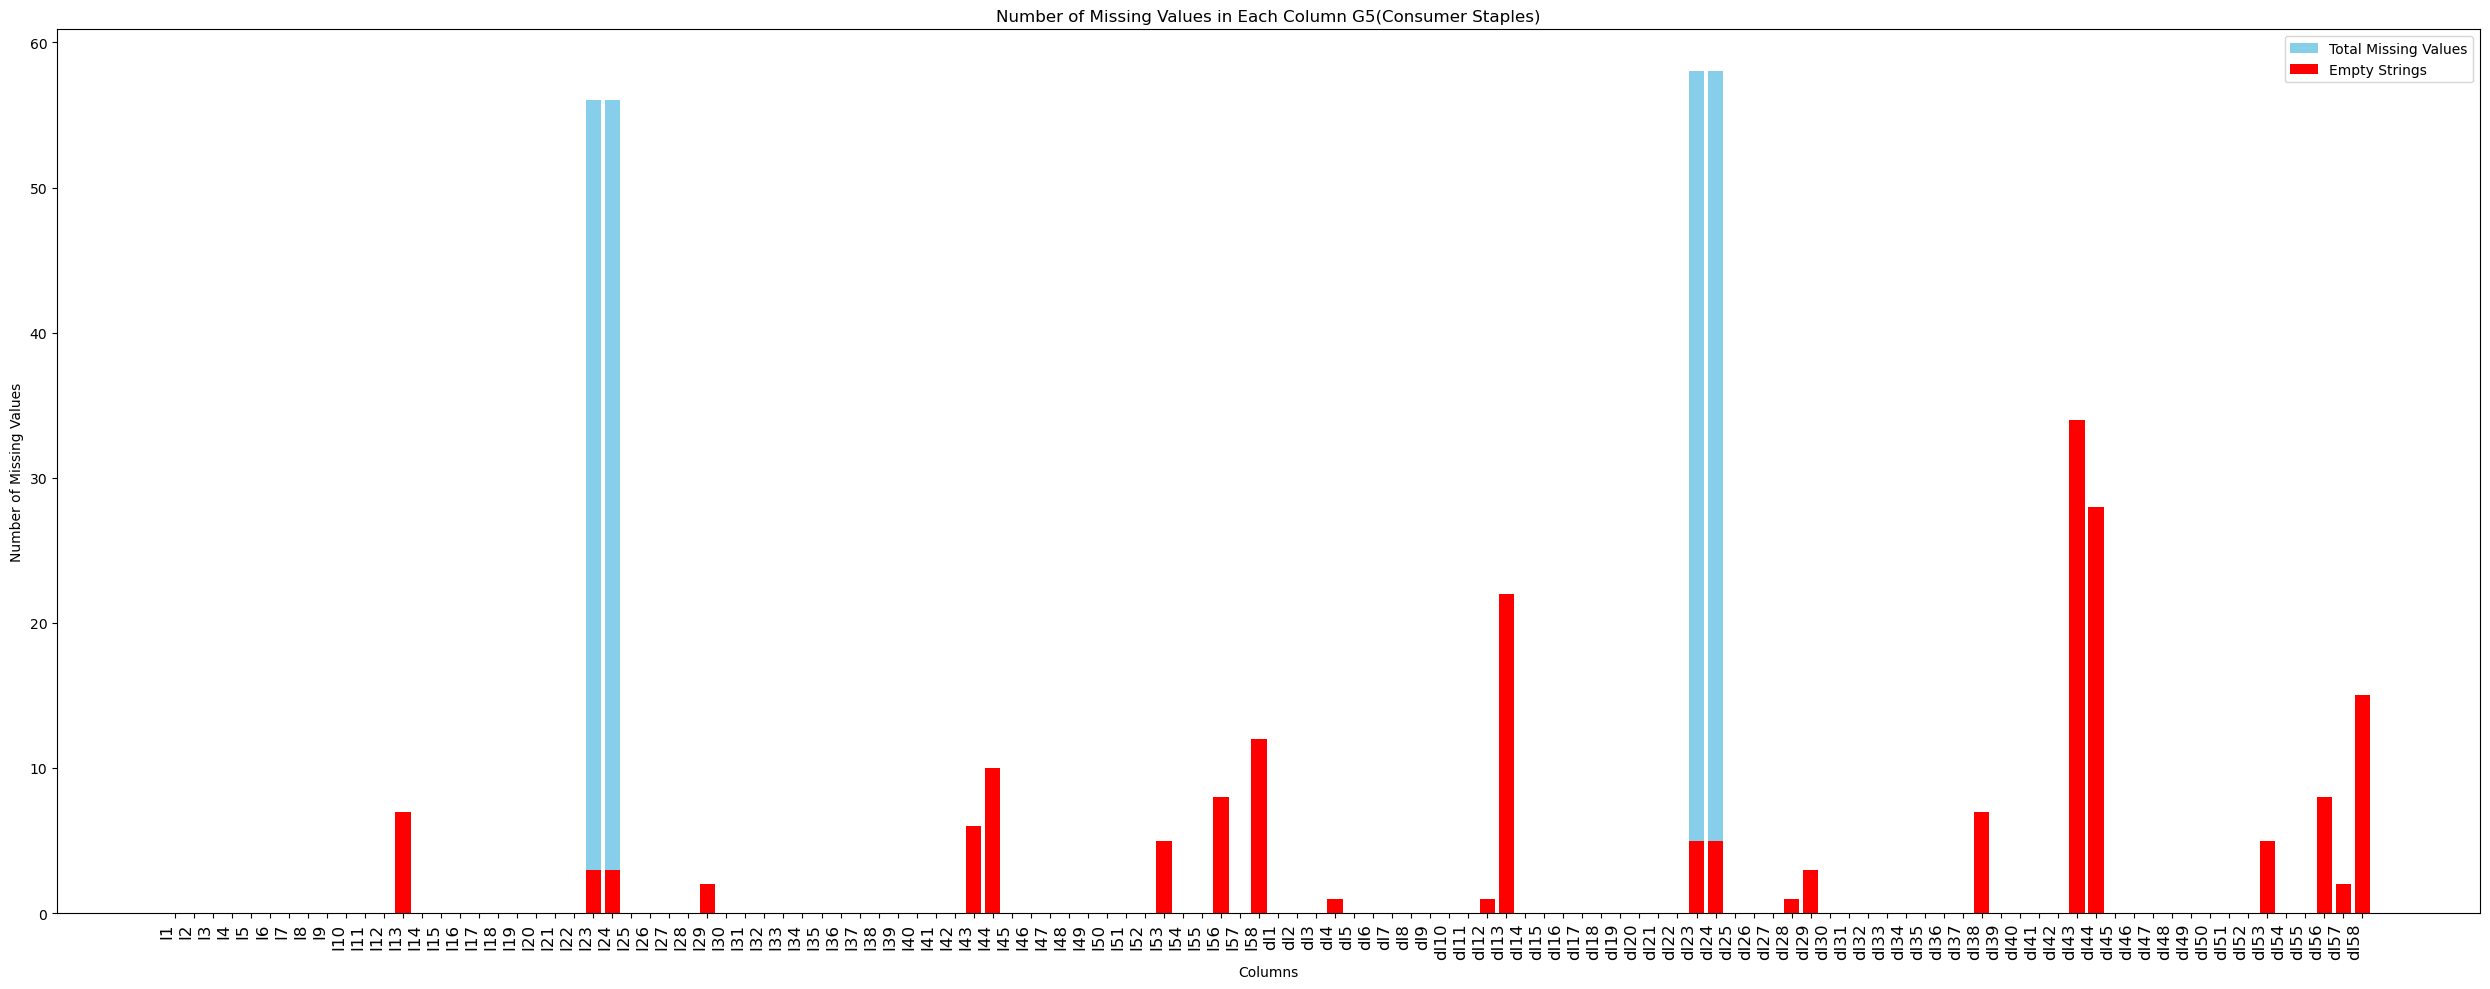

In [34]:
dataG1 = data.loc[data['Group'] == 'G5']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G5']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column G5('+ group_dict['G5'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

In [54]:
col_dict['I44']

'PE Growth Ratio, TTM'

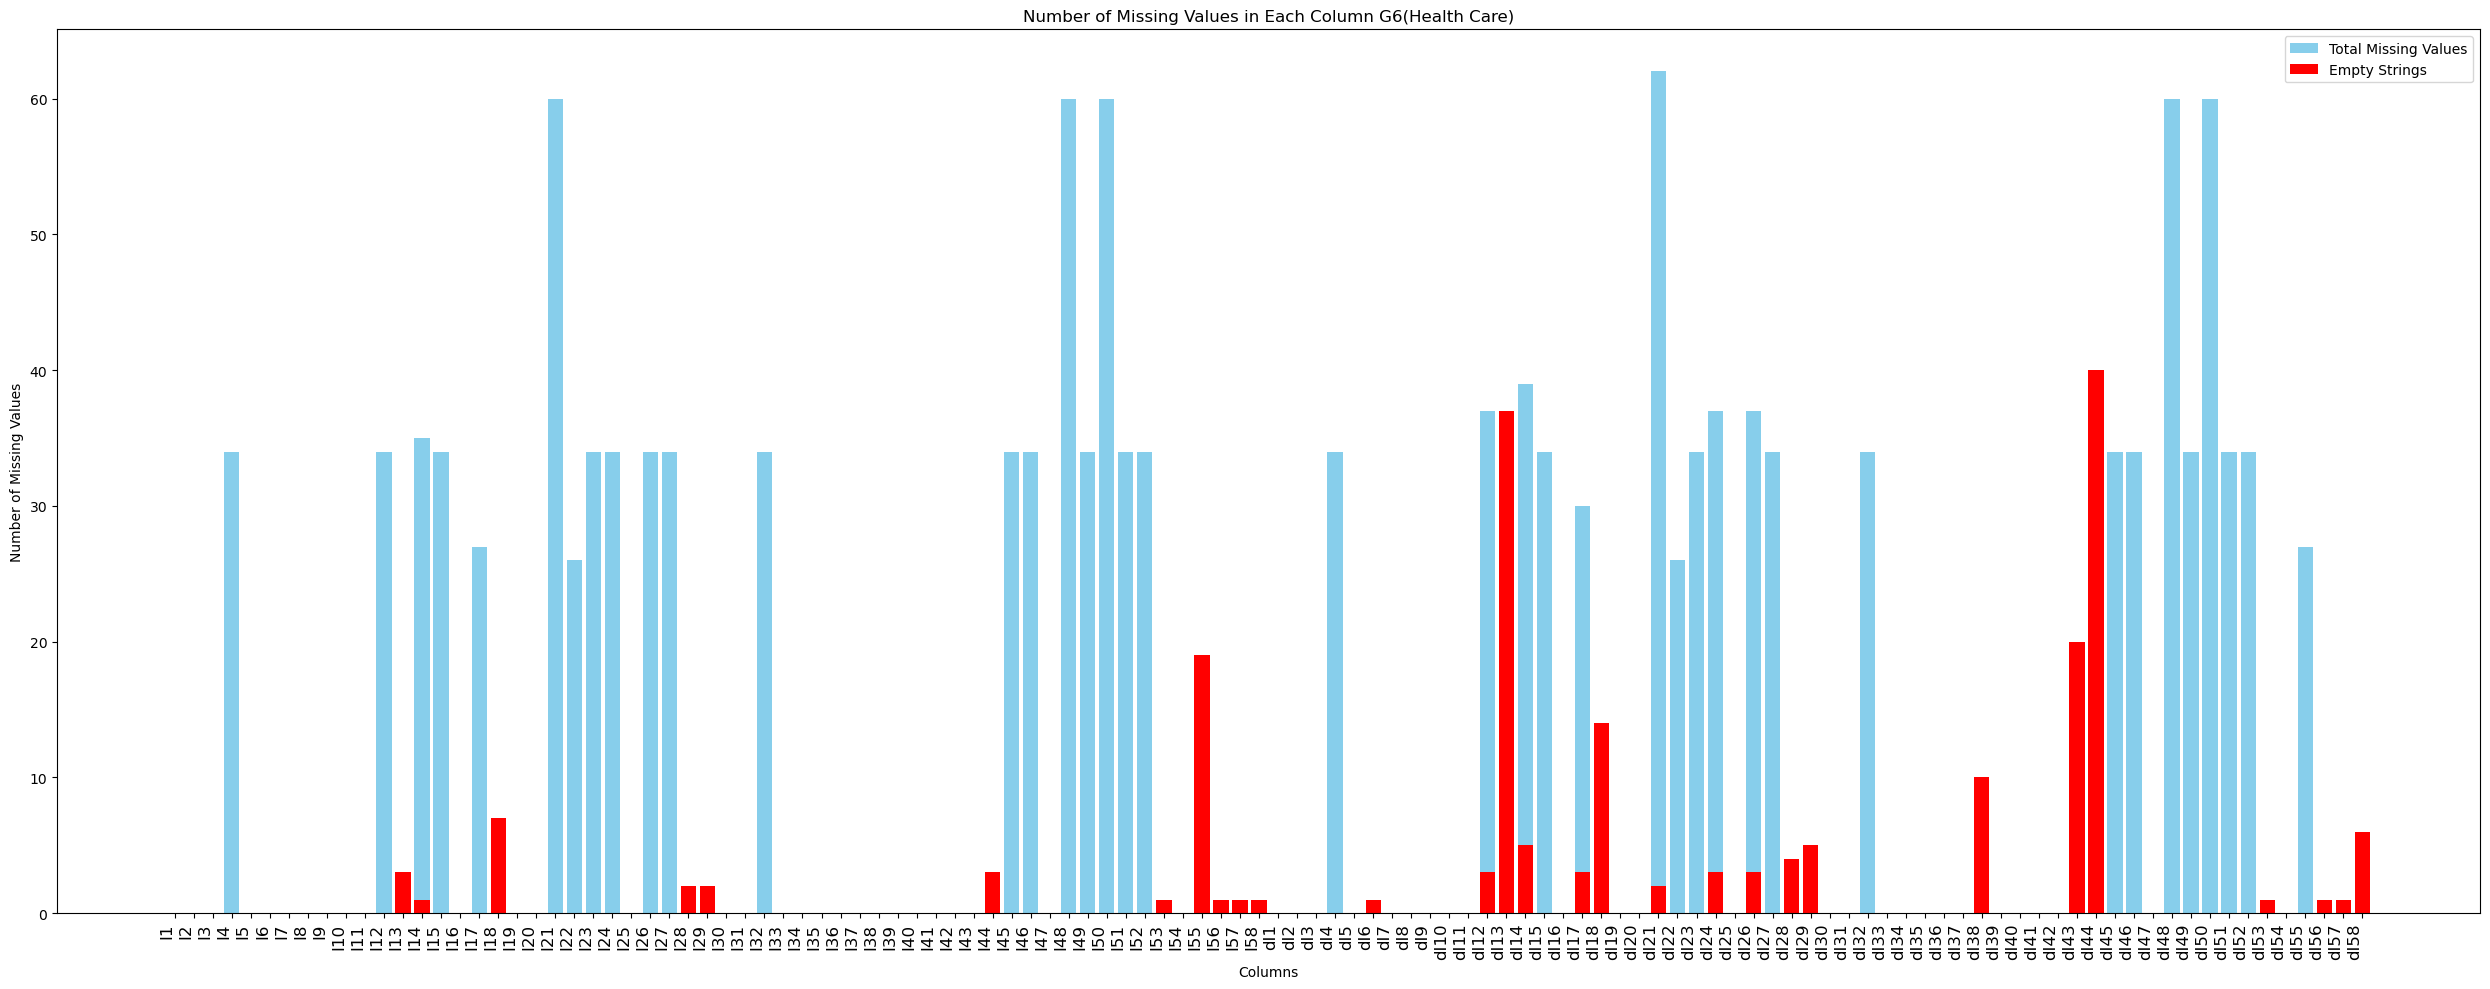

In [35]:
dataG1 = data.loc[data['Group'] == 'G6']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G6']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column G6('+ group_dict['G6'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

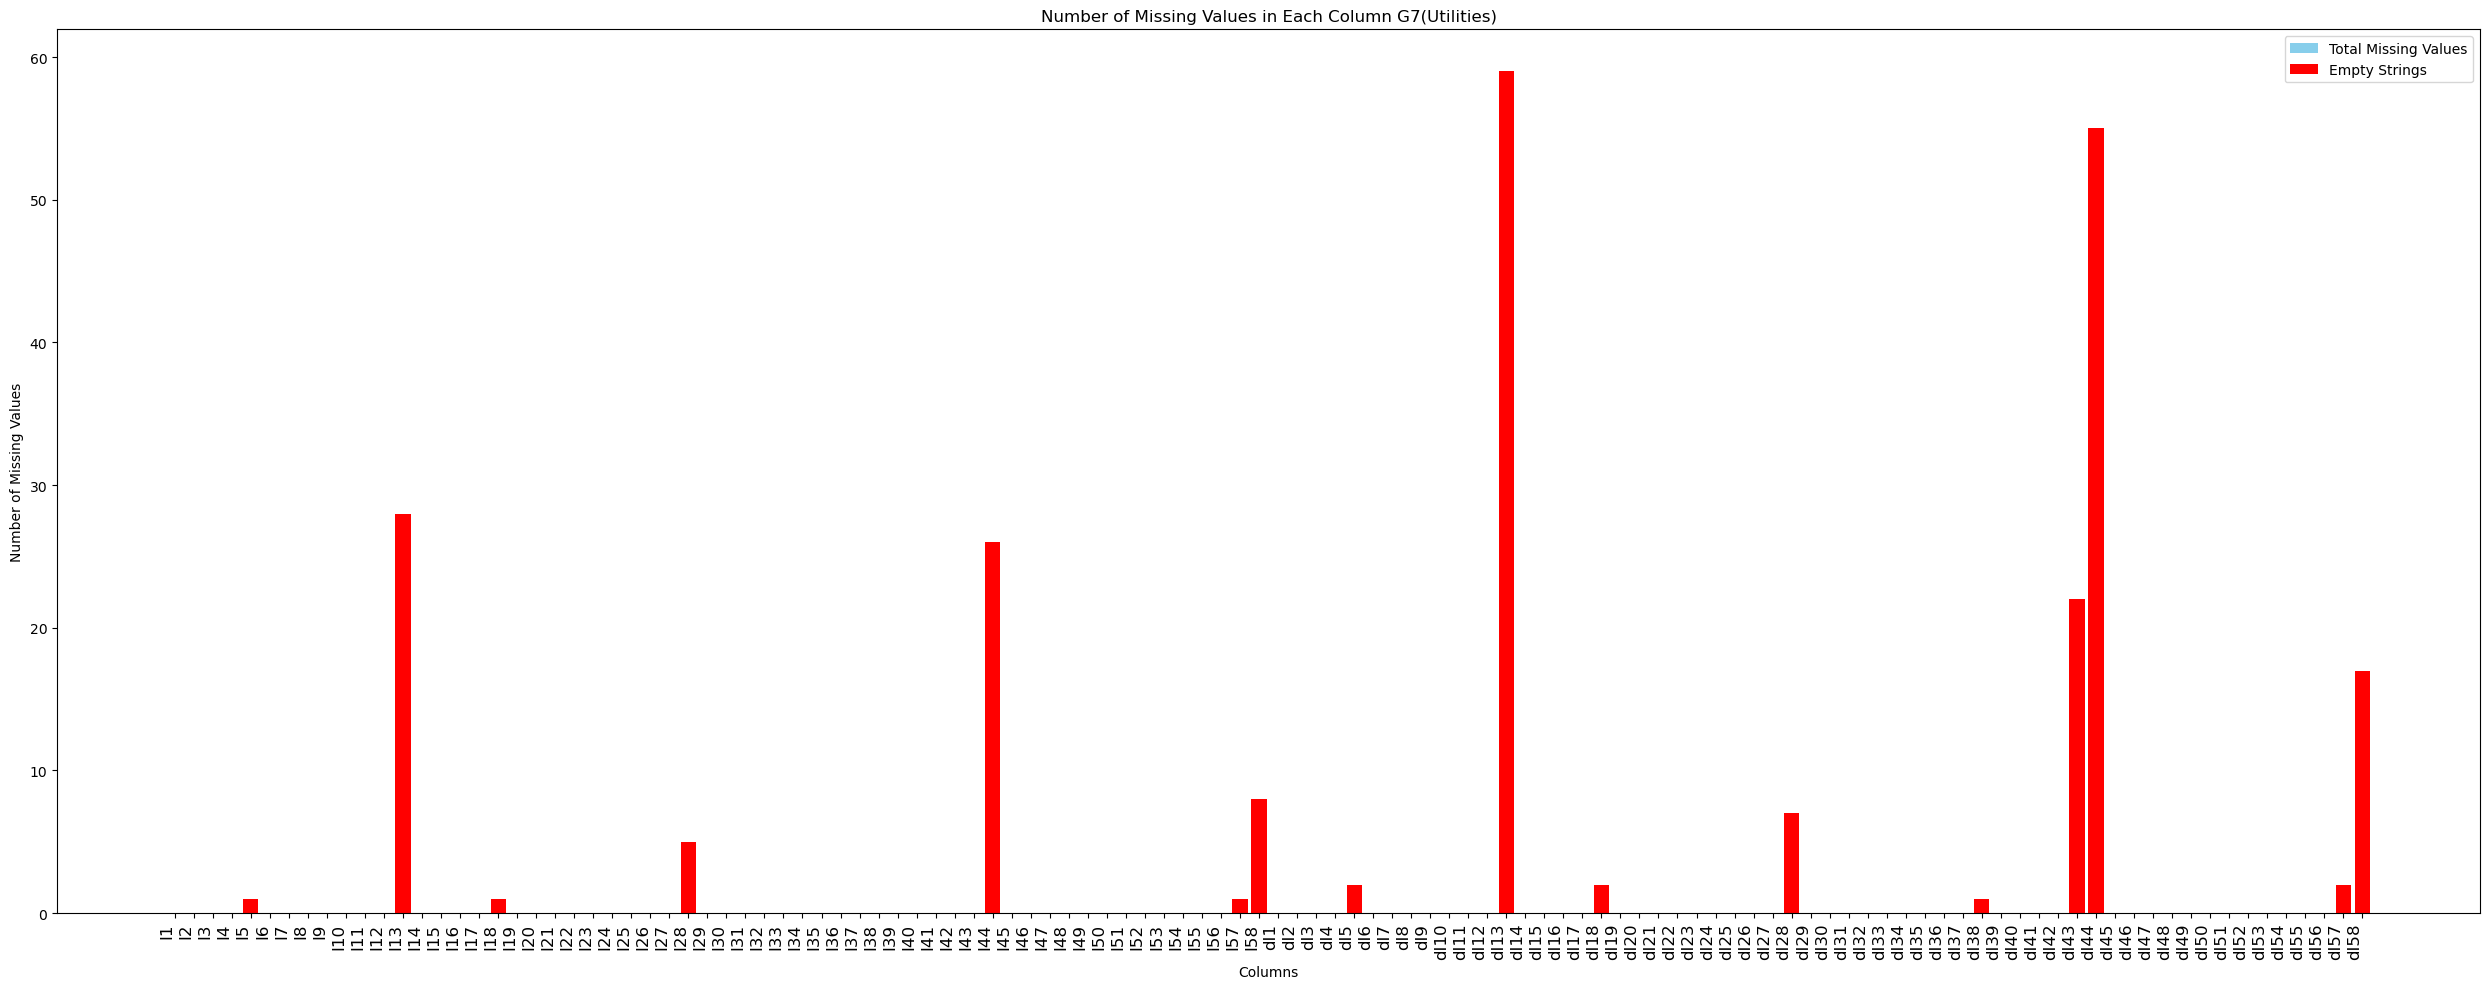

In [36]:
dataG1 = data.loc[data['Group'] == 'G7']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G7']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column G7('+ group_dict['G7'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

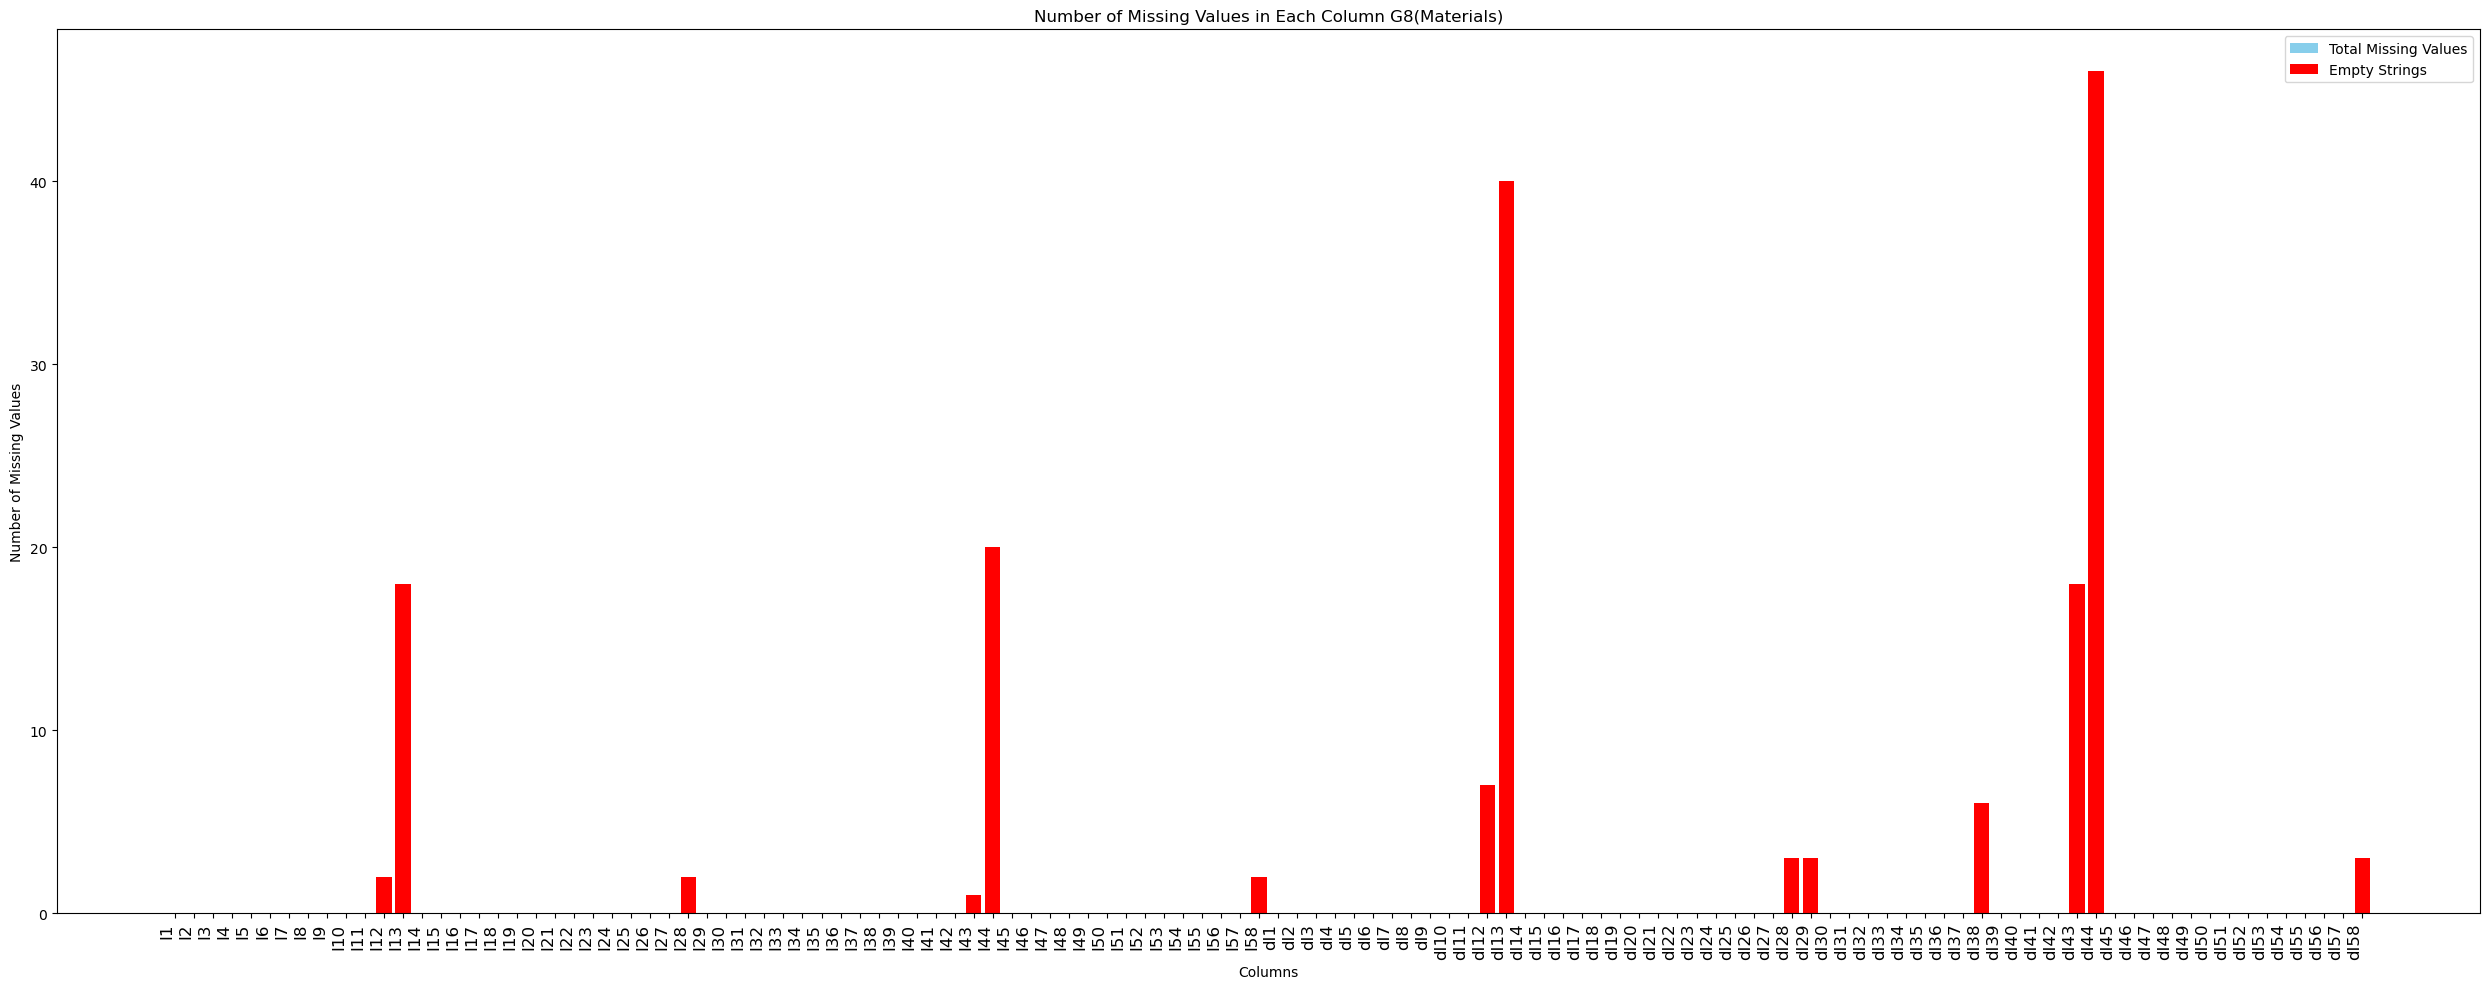

In [37]:
dataG1 = data.loc[data['Group'] == 'G8']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G8']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column G8('+ group_dict['G8'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

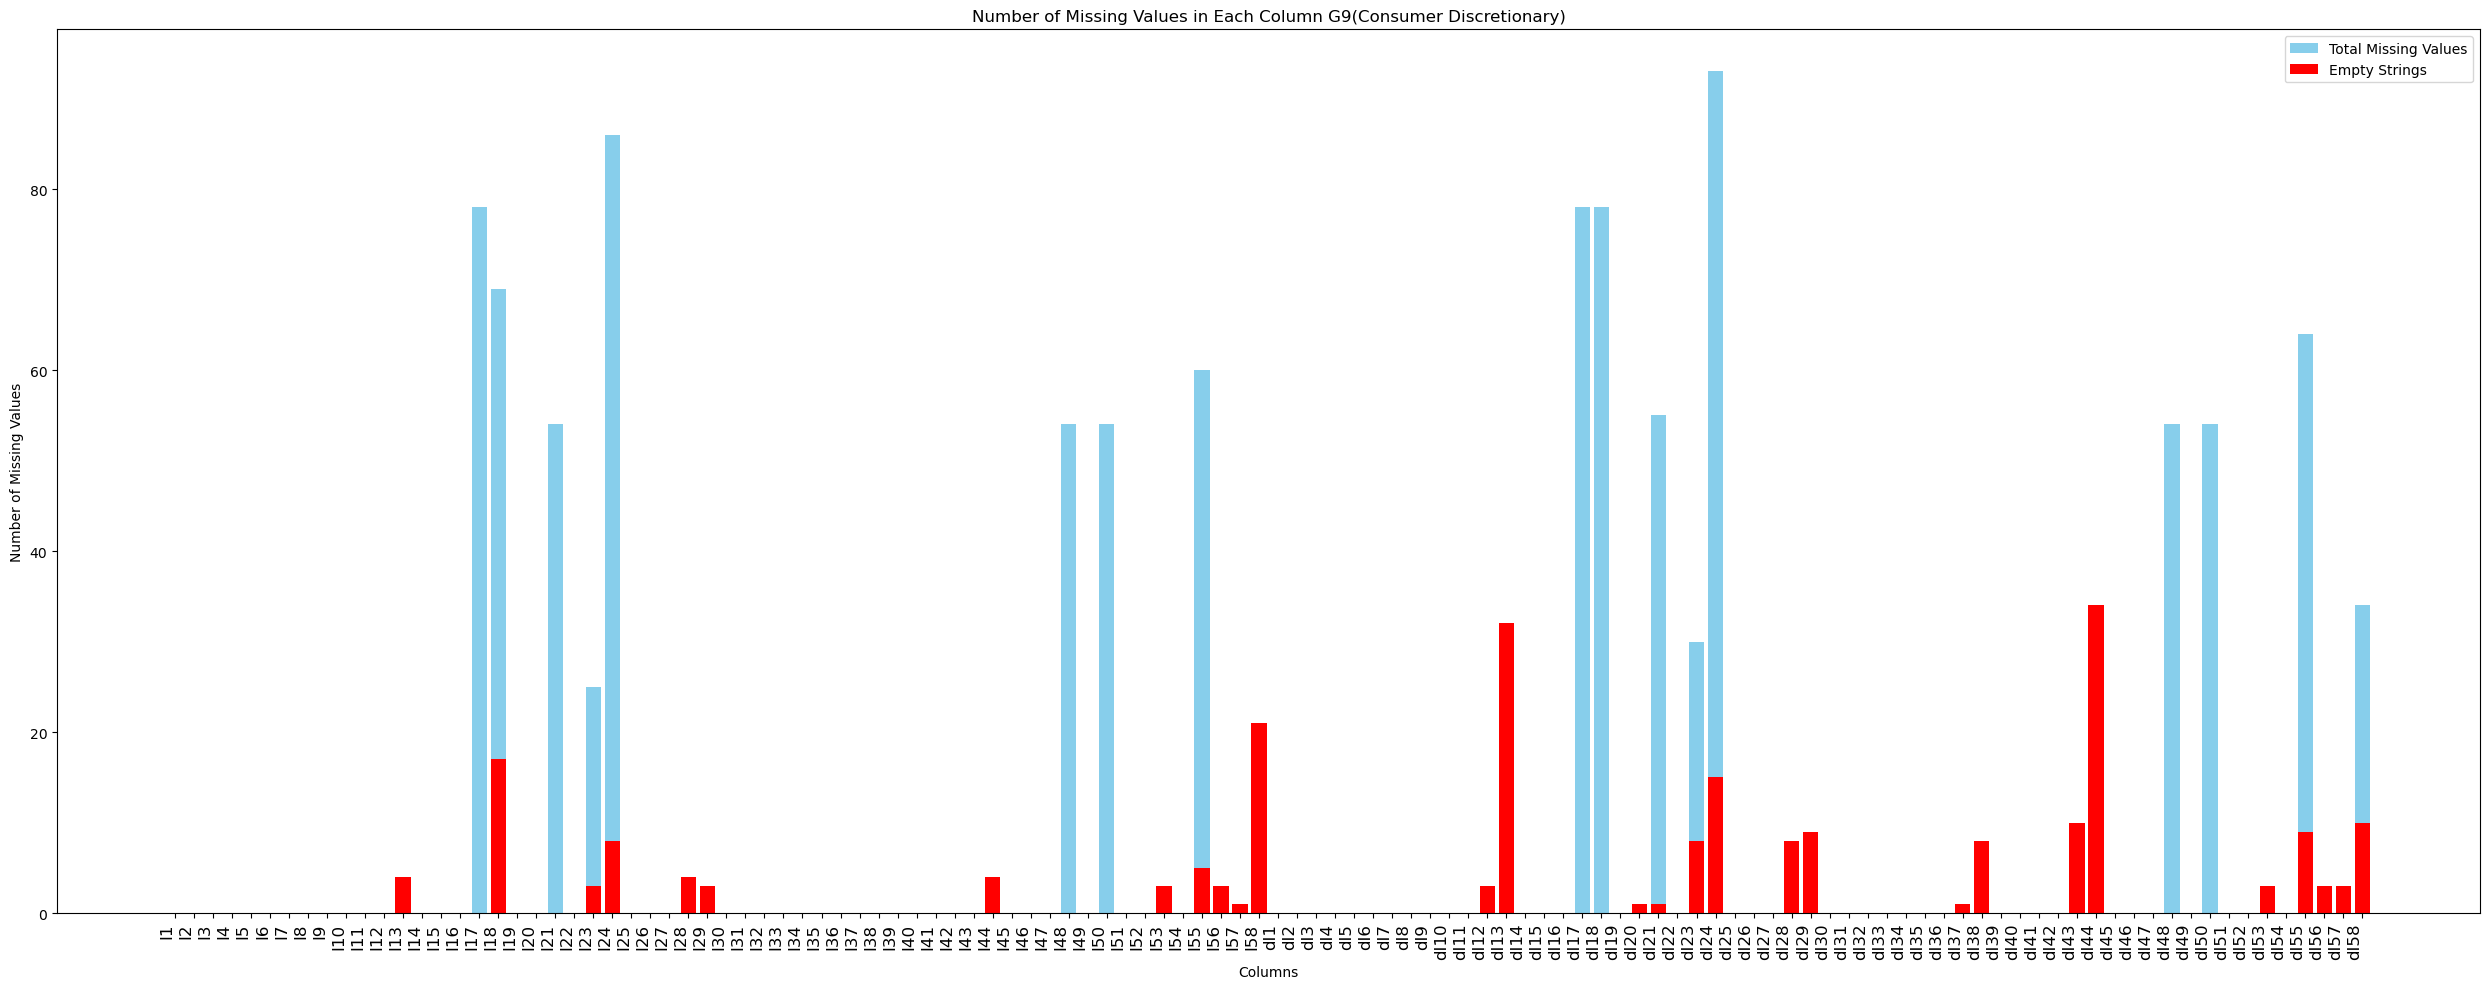

In [38]:
dataG1 = data.loc[data['Group'] == 'G9']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G9']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column G9('+ group_dict['G9'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

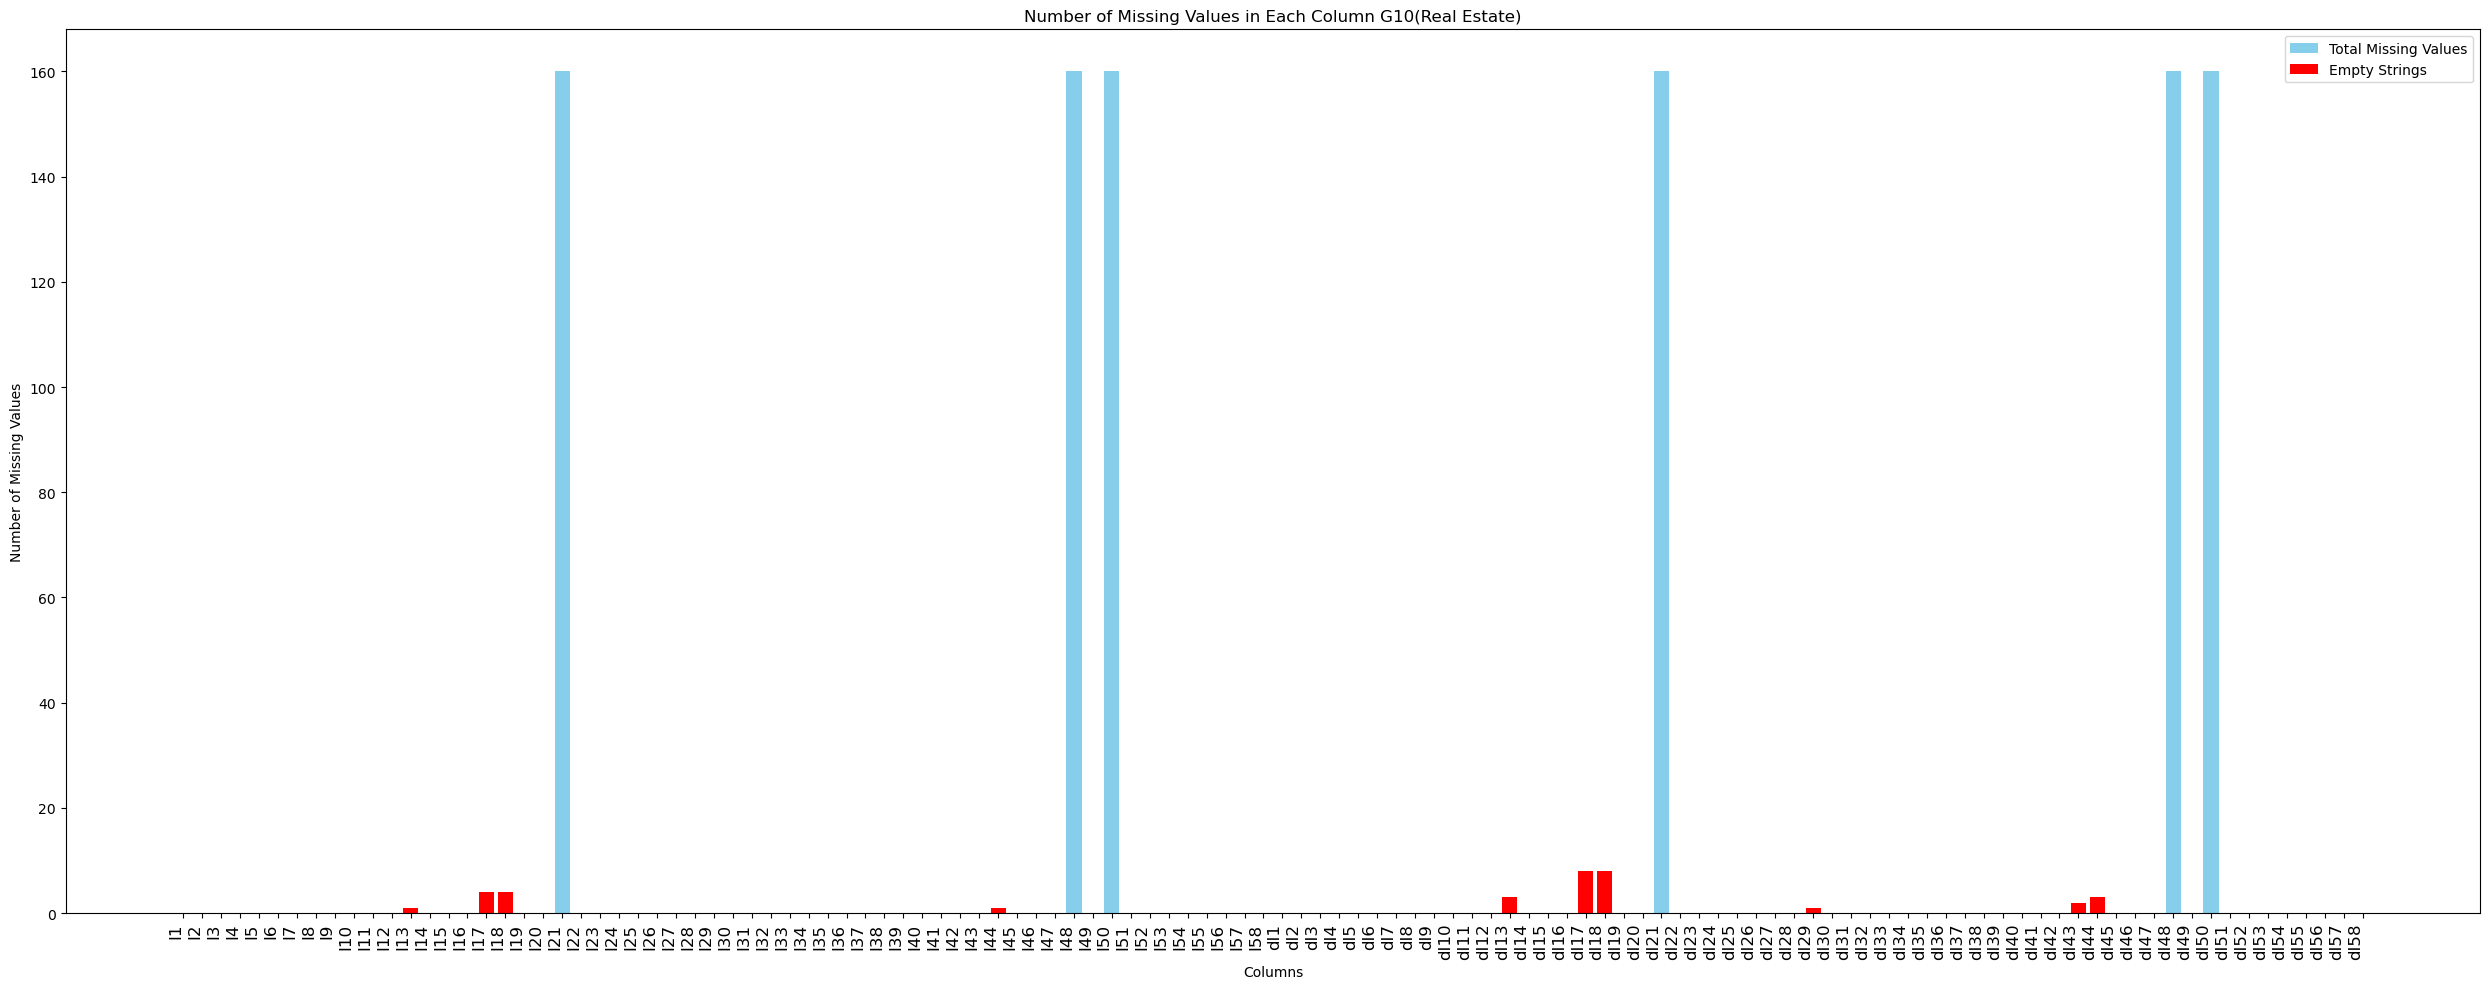

In [40]:
dataG1 = data.loc[data['Group'] == 'G10']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G10']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column G10('+ group_dict['G10'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

In [63]:
sum(data.loc[data['Group'] == 'G10', 'I21'].isna()) / len(data[data['Group'] == 'G10'])

1.0

In [64]:
print(col_dict['I21'],col_dict['I48'],col_dict['I50'])

Inventory Turnover, TTM Inventories Percentage of Total Assets Quick Ratio


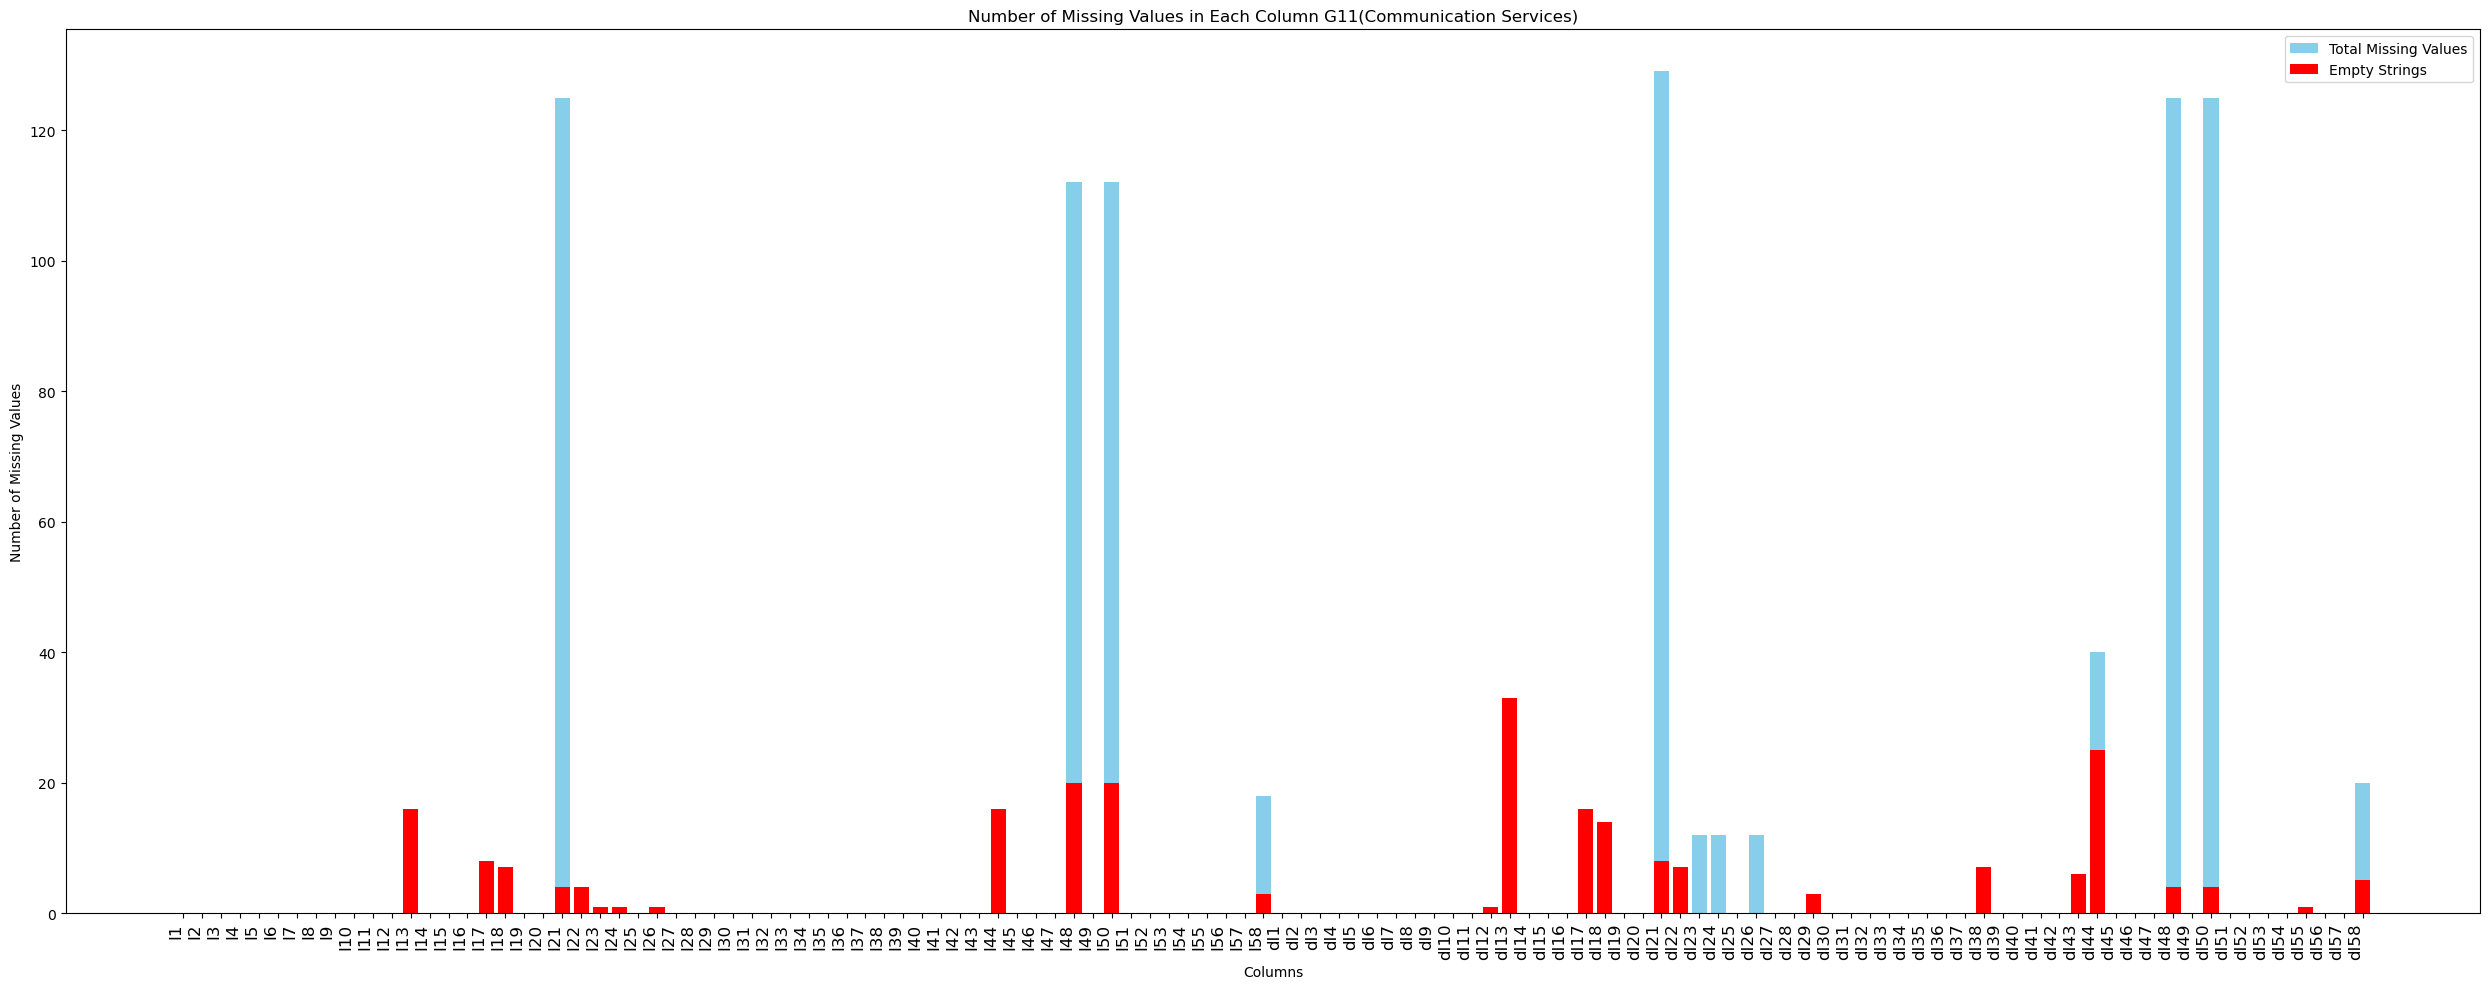

In [39]:
dataG1 = data.loc[data['Group'] == 'G11']
missing_values_count = dataG1[numerical_col].isna().sum()
data2G1 = data2.loc[data2['Group'] == 'G11']
empty_values_count = missing_values_count - data2G1[numerical_col].isna().sum()

total_missing_df = pd.concat([missing_values_count, empty_values_count], axis=1).reset_index()
total_missing_df = total_missing_df.rename(columns={'index':'Feature', 0:'Total_Missing', 1:'Empty'})
total_missing_df

# Visualisation of missing values

# Set figure size
plt.figure(figsize=(25, 10))
#missing_values_count.plot(kind='bar', color='skyblue')

# Plot total missing values with a light blue color
plt.bar(total_missing_df['Feature'], total_missing_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_df['Feature'], total_missing_df['Empty'], color='red', label='Empty Strings')


# Customize plot labels and title
plt.title('Number of Missing Values in Each Column G11('+ group_dict['G11'] + ')')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=12)
plt.tight_layout()  
plt.legend()
plt.show()

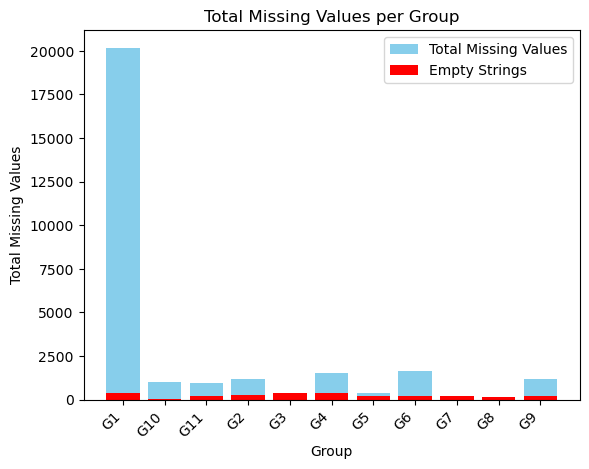

In [37]:
# Create a boolean mask indicating missing values
missing_values_mask = data[numerical_col].isna()

# Group by 'Group' and sum the number of missing values in each group
missing_values_per_group_df = missing_values_mask.groupby(data['Group']).sum()

missing_sum_per_group = missing_values_per_group_df.sum(axis=1)

# Create a boolean mask indicating empty strings
empty_string_mask = (data2[numerical_col] == '')

# Group by 'Group' and sum the number of empty strings in each group
empty_per_group_df = empty_string_mask.groupby(data2['Group']).sum()
empty_sum_per_group = empty_per_group_df.sum(axis=1)
total_missing_per_group_df = pd.concat([missing_sum_per_group, empty_sum_per_group], axis=1).reset_index()
total_missing_per_group_df = total_missing_per_group_df.rename(columns={0:'Total_Missing', 1:'Empty'})

#total_missing_per_group_df

# Plot total missing values with a light blue color
plt.bar(total_missing_per_group_df['Group'], total_missing_per_group_df['Total_Missing'], color='skyblue', label='Total Missing Values')

# Plot missing values represented by empty strings with a different color
plt.bar(total_missing_per_group_df['Group'], total_missing_per_group_df['Empty'], color='red', label='Empty Strings')

# Set the title and labels
plt.title('Total Missing Values per Group')
plt.xlabel('Group')
plt.ylabel('Total Missing Values')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Observations: Not uniform distributed across groups, G1 (Financials) has significant high number of missing values
# number of empty strings is uniformed though
# We cannot run a statistical test (chi-sqaure independence test for Group and the missing indicators) because the assumption of independence is violated

In [9]:
# How many % of the observations from G1 is missing? (100%, I21 - Inventory Turnover is always missing (NA))

data[data['Group'] == 'G1'].isna().any(axis=1).sum()
data[data['Group'] == 'G1'].isna().any(axis=1).sum()/len(data[data['Group'] == 'G1'])


1.0

In [20]:
print(sum(data2.loc[data2['Group'] == 'G1', 'I21'].isna()))
print(len(data[data['Group'] == 'G1']))

880
880


In [39]:
# creating a dummy column associated with that
cols_with_missing = [col for col in data.columns if data[col].isnull().any()]

# Dummy column indicating missing values
data_copy = data.copy()
for col in cols_with_missing:
    data_copy[col + '_missing'] = data_copy[col].isnull().astype(int)

#print(len(data.columns))
#print(len(cols_with_missing)) # 75
#print(len(data_copy.columns))
data_copy.head()


Group        I1        I2        I3        I4        I5        I6        I7  \
0    G9  0.136495 -0.028429 -0.037772 -0.232459 -0.016222 -0.187506 -0.322545   
1    G5 -0.714522 -0.042137 -0.052968 -0.796862 -0.018394  0.070102 -0.076321   
2   G10  0.104791 -0.038188 -0.053191  0.620233  0.148587  0.489875  0.319274   
3    G2 -0.532847 -0.006582 -0.023377  1.306702 -0.068909  0.048024 -0.119481   
4    G3 -0.200815 -0.016334 -0.036754 -0.886675  0.484495 -1.148744  0.152517   

         I8        I9  ...  dI48_missing  dI49_missing  dI50_missing  \
0 -0.043743  0.125389  ...             0             0             0   
1 -0.063864 -1.045521  ...             0             0             0   
2 -0.060246  0.053174  ...             1             0             1   
3 -0.021057 -1.012916  ...             1             0             1   
4 -0.043580 -0.935537  ...             0             0             0   

   dI51_missing  dI52_missing  dI53_missing  dI55_missing  dI56_missing  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   dI57_missing  dI58_missing  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  

[5 rows x 194 columns]

In [40]:
# Calculate correlations between variables in the DataFrame
missing_indicator = [col for col in data_copy.columns if 'missing' in col]
col_to_select = numerical_col.tolist()
col_to_select.extend(missing_indicator)

correlation_matrix_with_missing = data_copy[col_to_select].corr()
correlation_matrix_with_missing


I1        I2        I3        I4        I5        I6  \
I1            1.000000  0.154523  0.111331  0.628866 -0.104586  0.053769   
I2            0.154523  1.000000  0.981837  0.083077 -0.017656  0.006494   
I3            0.111331  0.981837  1.000000  0.060241 -0.012991 -0.002377   
I4            0.628866  0.083077  0.060241  1.000000 -0.102095  0.281641   
I5           -0.104586 -0.017656 -0.012991 -0.102095  1.000000  0.472477   
...                ...       ...       ...       ...       ...       ...   
dI53_missing  0.043983  0.587948  0.597922  0.026564  0.000500  0.008751   
dI55_missing  0.196477 -0.009136 -0.014548  0.114063 -0.015011  0.015488   
dI56_missing  0.036904  0.590327  0.639482  0.025345 -0.002183  0.007074   
dI57_missing -0.133599 -0.015946 -0.018571 -0.023913  0.164633  0.341331   
dI58_missing -0.139384 -0.018827 -0.019698 -0.045434 -0.104251 -0.148688   

                    I7        I8        I9       I10  ...  dI48_missing  \
I1           -0.036570  0.111751  0.788159  0.174655  ...     -0.130365   
I2           -0.015861  0.973780  0.126390  0.924900  ...     -0.010595   
I3           -0.020200  0.985997  0.108152  0.863577  ...     -0.016254   
I4            0.012990  0.062366  0.539203  0.101547  ...      0.147891   
I5            0.536551  0.015534  0.035382 -0.020563  ...      0.087888   
...                ...       ...       ...       ...  ...           ...   
dI53_missing -0.000109  0.578195  0.050694  0.520312  ...      0.000644   
dI55_missing  0.005148 -0.014684  0.177469 -0.003962  ...     -0.056979   
dI56_missing -0.002936  0.625806  0.049243  0.454916  ...      0.000744   
dI57_missing  0.328319 -0.003299 -0.130984 -0.013688  ...      0.237495   
dI58_missing -0.170042 -0.038785 -0.294259 -0.014187  ...      0.150438   

              dI49_missing  dI50_missing  dI51_missing  dI52_missing  \
I1               -0.223568     -0.130365     -0.223568     -0.223568   
I2               -0.029799     -0.010595     -0.029799     -0.029799   
I3               -0.034642     -0.016254     -0.034642     -0.034642   
I4                     NaN      0.147891           NaN           NaN   
I5                0.147834      0.087888      0.147834      0.147834   
...                    ...           ...           ...           ...   
dI53_missing     -0.011463      0.000644     -0.011463     -0.011463   
dI55_missing     -0.038970     -0.056979     -0.038970     -0.038970   
dI56_missing     -0.013240      0.000744     -0.013240     -0.013240   
dI57_missing      0.444332      0.237495      0.444332      0.444332   
dI58_missing      0.287481      0.150438      0.287481      0.287481   

              dI53_missing  dI55_missing  dI56_missing  dI57_missing  \
I1                0.043983      0.196477      0.036904     -0.133599   
I2                0.587948     -0.009136      0.590327     -0.015946   
I3                0.597922     -0.014548      0.639482     -0.018571   
I4                0.026564      0.114063      0.025345     -0.023913   
I5                0.000500     -0.015011     -0.002183      0.164633   
...                    ...           ...           ...           ...   
dI53_missing      1.000000     -0.006386      0.865754     -0.005678   
dI55_missing     -0.006386      1.000000     -0.007377     -0.019305   
dI56_missing      0.865754     -0.007377      1.000000     -0.006559   
dI57_missing     -0.005678     -0.019305     -0.006559      1.000000   
dI58_missing     -0.007768     -0.021419     -0.008973      0.149761   

              dI58_missing  
I1               -0.139384  
I2               -0.018827  
I3               -0.019698  
I4               -0.045434  
I5               -0.104251  
...                    ...  
dI53_missing     -0.007768  
dI55_missing     -0.021419  
dI56_missing     -0.008973  
dI57_missing      0.149761  
dI58_missing      1.000000  

[191 rows x 191 columns]

In [41]:
# Look at 5 examples and try to interpret the results

for miss_col in missing_indicator[:5]:
    correlation_values = correlation_matrix_with_missing[miss_col][numerical_col]
    abs_correlation_values = correlation_values.abs()
    sign_correlation_values = correlation_values.apply(np.sign)
    
    # Print the top 5 absolute correlation values along with their signs
    top_correlation_values = abs_correlation_values.nlargest(5)
    for idx in top_correlation_values.index:
        print(f"Correlation between {miss_col} and {idx}: {correlation_values[idx]: .2f}")
    print('\n')
    
# The missingless in I4 seems to be able to be explained by I16; For those rows with missing values in I4, they have a higher mean 2.8631 in I16 vs -0.006 (without filter)
#print(col_dict['I4'], col_dict['I16']) #EBITDA Percentage of Total Fixed Assets - Net, TTM Cash Percentage of Total Revenue, TTM

# On the other hand, those rows with missing values in I13, a lower mean in I1

Correlation between I4_missing and I16:  0.53
Correlation between I4_missing and I56:  0.44
Correlation between I4_missing and I6:  0.38
Correlation between I4_missing and I7:  0.35
Correlation between I4_missing and I17:  0.35


Correlation between I5_missing and I30:  0.28
Correlation between I5_missing and dI30:  0.21
Correlation between I5_missing and I39:  0.16
Correlation between I5_missing and I17:  0.15
Correlation between I5_missing and dI39:  0.14


Correlation between I6_missing and dI43:  0.09
Correlation between I6_missing and I43:  0.06
Correlation between I6_missing and dI15:  0.04
Correlation between I6_missing and dI20:  0.04
Correlation between I6_missing and dI9:  0.03


Correlation between I12_missing and I16:  0.53
Correlation between I12_missing and I56:  0.44
Correlation between I12_missing and I6:  0.38
Correlation between I12_missing and I7:  0.35
Correlation between I12_missing and I17:  0.35


Correlation between I13_missing and I41: -0.29
Correlation between

# Outlier Detection

In [42]:
# Preparing for outlier flags only

group_mean = merged_df.groupby('Group')[numerical_col].mean()
group_mean

group_std = merged_df.groupby('Group')[numerical_col].std()
group_std

group_q1 = merged_df.groupby('Group')[numerical_col].quantile(0.25)
group_q1

group_q3 = merged_df.groupby('Group')[numerical_col].quantile(0.75)
group_q3
#merged_df.groupby('Group')[numerical_col].mean().loc[:, 'I33':'I34']
#merged_df.groupby('Group')[numerical_col].mean().loc[:, 'I44'] #I44 has a lot of outliners with IQR metric
# G1 displays a higher mean relatively to other groups as expected

I1        I2        I3        I4        I5        I6        I7  \
Group                                                                         
G1    -0.347741 -0.029408 -0.042053  0.381329  0.540440  1.136868  1.050030   
G10   -0.352670 -0.024379 -0.018056  0.080003  0.283945  0.345394  0.721474   
G11    0.447993 -0.024783 -0.027691  0.510264  0.101962  0.154648  0.153681   
G2     0.535988 -0.015635 -0.023522  0.494733 -0.032320  0.016425 -0.123441   
G3     0.179373 -0.027148 -0.032393 -0.413179  0.280103  0.027925  0.545323   
G4     1.183137 -0.012394 -0.026817  1.352845  0.099956  0.416962  0.387442   
G5     0.466743 -0.009416 -0.016683 -0.126599 -0.041776  0.019683 -0.135582   
G6     0.686881 -0.019424 -0.033176  0.296273  0.019981  0.267353  0.176643   
G7    -0.604644 -0.035788 -0.039325 -0.831356  0.233060 -0.398844  0.319752   
G8     0.234639 -0.019024 -0.024897 -0.207411  0.046934 -0.060748 -0.053717   
G9     1.072310 -0.008187 -0.018535  0.488535 -0.023809 -0.095718 -0.241605   

             I8        I9       I10  ...      dI49      dI50      dI51  \
Group                                ...                                 
G1    -0.028005 -0.598394 -0.019677  ...  0.032716       NaN  0.096156   
G10   -0.026711 -0.374956 -0.029264  ...  0.117998       NaN  0.189422   
G11   -0.038389  0.368306 -0.007985  ...  0.089691  0.077688  0.157375   
G2    -0.028728  0.431689 -0.004675  ...  0.098106  0.110385  0.145547   
G3    -0.035974  0.649654 -0.019232  ...  0.106273  0.120009  0.102781   
G4    -0.023440  1.475873  0.005313  ...  0.157054  0.188119  0.185562   
G5    -0.018269  0.343343 -0.008686  ...  0.079863  0.070000  0.159000   
G6    -0.037003  0.498876 -0.003942  ...  0.202094  0.220445  0.204687   
G7    -0.045891 -0.658971 -0.032358  ...  0.068360  0.081404  0.080187   
G8    -0.029204  0.281813 -0.010206  ...  0.158223  0.174771  0.156938   
G9    -0.017873  1.053879  0.011430  ...  0.084863  0.076872  0.136375   

           dI52      dI53      dI54      dI55      dI56      dI57      dI58  
Group                                                                        
G1     0.035318  0.017662  0.085806  0.095033  0.255475  0.203945  0.010565  
G10    0.122578  0.054839  0.168634  0.181961  0.076140  0.018559  0.013037  
G11    0.118584  0.014194  0.112145  0.171404  0.253067  0.024494  0.005311  
G2     0.075844  0.014347  0.139107  0.191809  0.100615  0.040436  0.010294  
G3     0.111435  0.007930  0.079666  0.136024  0.370734  0.015956  0.003284  
G4     0.168812  0.014689  0.187526  0.217801  0.085782  0.058943  0.010883  
G5     0.060909  0.020057  0.152938  0.215180  0.063598  0.029635  0.009207  
G6     0.143805  0.011437  0.122584  0.157016  0.096409  0.047402  0.012629  
G7     0.026675  0.013638  0.052073  0.158333  0.167383  0.005122  0.005136  
G8     0.150883  0.013094  0.109023  0.119317  0.177539  0.022914  0.009362  
G9     0.097052  0.022424  0.199645  0.183139  0.094667  0.034221  0.010164  

[11 rows x 116 columns]

In [43]:
"""
data = {'Group':['A', 'A', 'A', 'B', 'B', 'B'], 'Age':[20, 21, 19, 18, 2, 17], 'Weight': [1,2,3,4,5,6]} 
df = pd.DataFrame(data) 

groups = df.groupby('Group')
means = groups.Age.transform('mean')
stds = groups.Age.transform('std')

df['Flag'] = df.Age.between(means-stds*3, means+stds*3)
df
"""

"\ndata = {'Group':['A', 'A', 'A', 'B', 'B', 'B'], 'Age':[20, 21, 19, 18, 2, 17], 'Weight': [1,2,3,4,5,6]} \ndf = pd.DataFrame(data) \n\ngroups = df.groupby('Group')\nmeans = groups.Age.transform('mean')\nstds = groups.Age.transform('std')\n\ndf['Flag'] = df.Age.between(means-stds*3, means+stds*3)\ndf\n"

In [44]:
# Identify outliners by IQR method without grouping

outlier_counts = pd.DataFrame(index=['IQR'], columns=numerical_col)

for col in numerical_col:
    # Calculate Q1 and Q3
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define threshold for identifying outliers
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = (data[col] < lower_threshold) | (data[col] > upper_threshold) # A Series mask (with boolean values)
    outlier_count = outliers.sum()
    
    # Store outlier count in the DataFrame
    outlier_counts.loc['IQR', col] = outlier_count

outlier_counts
#outlier_counts.loc['IQR','I1':'I58'].sort_values(ascending=False)

I1   I2   I3   I4   I5   I6   I7   I8   I9  I10  ...  dI49 dI50 dI51  \
IQR  305  555  612  436  772  596  345  632  270  558  ...  1011  823  548   

     dI52  dI53 dI54 dI55 dI56  dI57 dI58  
IQR  1321  1083  633  688  926  1435  810  

[1 rows x 116 columns]

In [45]:
# Identify outliners by IQR method with grouping (2 things I did here - 1. I used the merged dataset to calculate the quantiles 2. Grouping)
outlier_counts = pd.DataFrame(index=['IQR'], columns=numerical_col)
for i in range(len(data)):
    for col in numerical_col:
        group = data.iloc[i]['Group']
        
        # Calculate Q1 and Q3
        Q1 = group_q1.loc[group,col]
        Q3 = group_q3.loc[group,col]
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define threshold for identifying outliers
        lower_threshold = Q1 - 1.5 * IQR
        upper_threshold = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = (data[col] < lower_threshold) | (data[col] > upper_threshold) # A Series mask (with boolean values)
        outlier_count = outliers.sum()
        
        # Store outlier count in the DataFrame
        outlier_counts.loc['IQR', col] = outlier_count

outlier_counts

I1   I2   I3   I4    I5    I6    I7   I8   I9  I10  ...  dI49 dI50 dI51  \
IQR  448  633  546  363  1453  1639  1755  682  481  763  ...  1174  911  565   

     dI52  dI53 dI54 dI55  dI56  dI57 dI58  
IQR  1536  1100  506  546  1145  1330  754  

[1 rows x 116 columns]

In [46]:
# It gives a different result than without grouping, now I27 has the most outliners (among the first 58 features)

outlier_counts.loc['IQR','I1':'I58'].sort_values(ascending=False)

I7     1755
I23    1646
I6     1639
I37    1471
I5     1453
I12    1362
I16    1357
I24    1351
I19    1343
I17    1177
I29    1161
I31    1152
I44    1131
I18    1121
I35    1102
I52    1086
I36    1083
I40    1024
I56     914
I41     882
I32     868
I34     852
I33     852
I57     835
I20     834
I53     809
I42     802
I30     779
I10     763
I25     747
I8      682
I47     667
I13     661
I49     649
I39     649
I38     644
I2      633
I22     632
I26     626
I28     621
I50     554
I3      546
I15     538
I58     486
I46     481
I9      481
I48     475
I14     452
I1      448
I21     399
I43     392
I4      363
I27     362
I11     340
I54     307
I51     270
I45     165
I55      82
Name: IQR, dtype: object

Text(0, 0.5, 'I27')

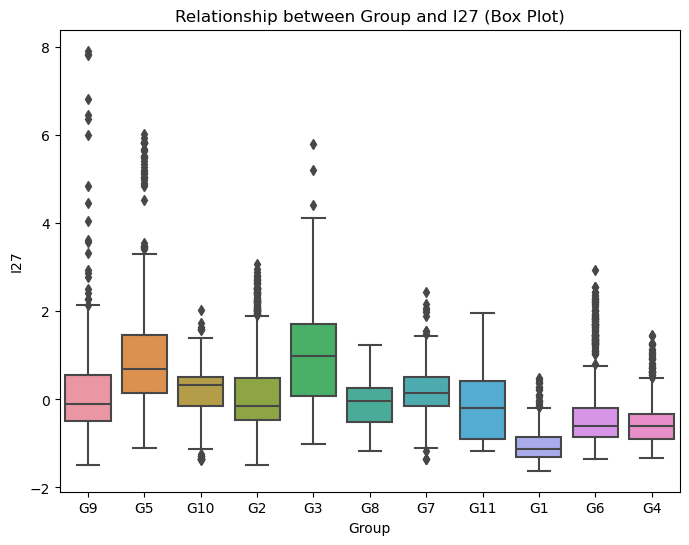

In [47]:
# Box Plot of I27

plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='I27', data=merged_df)
plt.title('Relationship between Group and I27 (Box Plot)')
plt.xlabel('Group')
plt.ylabel('I27')


In [ ]:
# Identify outliners by Z-score with grouping (2 things I did here - 1. I used the merged dataset to calculate the quantiles 2. Grouping)

for i in range(len(data)):
    for col in numerical_col:
        group = data.iloc[i]['Group']
        
        # Calculate z-score
        mean = group_mean.loc[group,col]
        std = group_std.loc[group,col]
        z_scores = (data[col] - mean) / std
        
        # Define threshold for identifying outliers
        z_score_threshold = 3  # Adjust this threshold as needed
    
        # Count outliers
        outliers = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)
        
        outlier_count = outliers.sum()
        
        # Store outlier count in the DataFrame
        outlier_counts.loc['Z-score', col] = outlier_count

outlier_counts

# Catboost

### Imputing missing values

In [108]:
medians_by_group = data.iloc[:,:-2].groupby(by = 'Group', dropna = True).median()
print(f"instances with 100% NA: {medians_by_group.isnull().sum().sum()}")
null_pos = medians_by_group.isna().stack()
print(f"Indexes whose median is zero: \n{null_pos[null_pos].index}")
print(f"\nG1: {group_dict['G1']},G10: {group_dict['G10']}")
cols = ['I21','I48','I50','dI21','dI48','dI50']
list(map(col_dict.get,cols))

instances with 100% NA: 12
Indexes whose median is zero: 
MultiIndex([( 'G1',  'I21'),
            ( 'G1',  'I48'),
            ( 'G1',  'I50'),
            ( 'G1', 'dI21'),
            ( 'G1', 'dI48'),
            ( 'G1', 'dI50'),
            ('G10',  'I21'),
            ('G10',  'I48'),
            ('G10',  'I50'),
            ('G10', 'dI21'),
            ('G10', 'dI48'),
            ('G10', 'dI50')],
           names=['Group', None])
G1: Financials,G10 Real Estate


['Inventory Turnover, TTM',
 'Inventories Percentage of Total Assets',
 'Quick Ratio',
 '1-year Absolute Change of Inventory Turnover, TTM',
 '1-year Absolute Change of Inventories Percentage of Total Assets',
 '1-year Absolute Change of Quick Ratio']

In [114]:
# Groups, Colummns with above 50% NAs.
for group, group_df in data.groupby('Group'):
    print(group)
    for col in group_df.columns[1:-2]:
        if len(group_df[group_df[col].isna()]) / len(group_df) > 0.6:
            print(col)
    


G1
I14
I21
I48
I50
dI14
dI21
dI48
dI50
G10
I21
I48
I50
dI21
dI48
dI50
G11
G2
G3
G4
G5
G6
G7
G8
G9


In [69]:
'''
# impute median by group for the rows with missing values.
dfs = []

for group_df in data.groupby('Group'):
    group_df = group_df[1]
    for col in group_df.columns[1:-2]:
        group_df.loc[group_df[col].isna() , col] = group_df[col].median()
    dfs.append(group_df)
    
data_imputed = pd.concat(dfs)
data_imputed.head()

#data_imputed has imputed values.
'''

Group        I1        I2        I3        I4        I5        I6  \
10    G1 -0.448898 -0.032152 -0.046113 -0.385375  0.240720 -0.104108   
13    G1 -0.931870 -0.039772 -0.052957 -0.120105  2.794369  0.509472   
15    G1 -0.929243 -0.038443 -0.051055 -0.120105  0.265908 -1.393592   
18    G1 -0.277337 -0.029376 -0.042223  0.006212  0.090210  0.325865   
21    G1 -0.910867 -0.039376 -0.053274 -0.120105 -0.993600  2.239514   

          I7        I8        I9  ...      dI51      dI52      dI53      dI54  \
10 -0.334163 -0.055549 -1.011588  ... -0.106500 -0.037429  0.017785  0.108635   
13  0.409639 -0.060682 -1.510078  ... -0.010188 -0.001935  0.035895  0.089241   
15 -1.636339 -0.085320 -1.877163  ... -0.010188 -0.001935  0.054746 -0.030901   
18  0.143257 -0.047286 -0.524942  ...  0.070312  0.008961 -0.005958  0.122873   
21  2.427011 -0.046815 -1.209142  ... -0.010188 -0.001935  0.003895  0.026740   

        dI55      dI56      dI57      dI58  Class   Perform  
10  0.037234 -0.267424 -0.063418  0.017294     -1 -0.049556  
13  0.032621 -1.077544 -0.334651  0.015061     -1 -0.189595  
15  0.084176  0.091827  4.111387  0.000338      1  0.190224  
18 -0.088204  0.080817  0.175658 -0.045083     -1 -0.145228  
21  0.119465  0.100706 -0.172742  0.001615     -1 -0.250825  

[5 rows x 119 columns]

In [118]:
null_df = data_imputed.isnull()

print("null in columns:")
col_null = null_df.sum()


#print("\n null in rows:")
#row_null = null_df.sum(axis = 1)
#print(row_null)

#print("\n total null values")
#print(null_df.sum().sum())

#print("rows with null values ")
#print(row_null.apply(lambda x: x != 0 ).sum())

null in columns:


KeyError: '0'

In [9]:
# I21, 48,50 and dI21, dI48, dI50 have very high missing values. Also 100% for G1 and G1
# so I drop these columns

# Also I2 is highly correlated with I3, I8 . I33 is highly correlated with I34.
# So I also drop I3, I8, I34

data_new = data.drop(columns = ['I21','I48','I50','dI21','dI48','dI50','I3','I8','I34'])

data_new.head()

Group        I1        I2        I4        I5        I6        I7        I9  \
0    G9  0.136495 -0.028429 -0.232459 -0.016222 -0.187506 -0.322545  0.125389   
1    G5 -0.714522 -0.042137 -0.796862 -0.018394  0.070102 -0.076321 -1.045521   
2   G10  0.104791 -0.038188  0.620233  0.148587  0.489875  0.319274  0.053174   
3    G2 -0.532847 -0.006582  1.306702 -0.068909  0.048024 -0.119481 -1.012916   
4    G3 -0.200815 -0.016334 -0.886675  0.484495 -1.148744  0.152517 -0.935537   

        I10       I11  ...      dI51      dI52      dI53      dI54      dI55  \
0 -0.014757 -0.033105  ...  0.102563  0.188481 -0.016027 -0.135451 -0.189667   
1 -0.037353 -0.792515  ... -0.016375  0.020727 -0.006525 -0.018790 -0.098543   
2 -0.025008 -0.456840  ...  0.272937  0.774169 -0.007144  0.123954  0.000000   
3 -0.011783  1.206727  ...  0.004938  0.018494 -0.003350 -0.029214  0.045747   
4 -0.023262 -0.908986  ... -0.014812 -0.324584 -0.019002 -0.379323 -0.046024   

       dI56      dI57      dI58  Class   Perform  
0  0.250967  0.022171 -0.004265     -1 -0.033764  
1  0.317744 -0.180502 -0.009215      1  0.127771  
2 -0.110103  0.186669 -0.030720      1  0.183500  
3 -0.076884 -0.037859 -0.012046     -1 -0.035668  
4  0.282145  0.011008  0.010496      1  0.235055  

[5 rows x 110 columns]

In [10]:
# impute median by group for the rows with missing values.
dfs = []

for group_df in data_new.groupby('Group'):
    group_df = group_df[1]
    for col in group_df.columns[1:-2]:
        group_df.loc[group_df[col].isna() , col] = group_df[col].median()
    dfs.append(group_df)
    
data_imputed = pd.concat(dfs)
data_imputed.head()

#data_imputed has imputed values.

Group        I1        I2        I4        I5        I6        I7  \
10    G1 -0.448898 -0.032152 -0.385375  0.240720 -0.104108 -0.334163   
13    G1 -0.931870 -0.039772 -0.120105  2.794369  0.509472  0.409639   
15    G1 -0.929243 -0.038443 -0.120105  0.265908 -1.393592 -1.636339   
18    G1 -0.277337 -0.029376  0.006212  0.090210  0.325865  0.143257   
21    G1 -0.910867 -0.039376 -0.120105 -0.993600  2.239514  2.427011   

          I9       I10       I11  ...      dI51      dI52      dI53      dI54  \
10 -1.011588 -0.026152 -0.646737  ... -0.106500 -0.037429  0.017785  0.108635   
13 -1.510078 -0.029708 -0.402698  ... -0.010188 -0.001935  0.035895  0.089241   
15 -1.877163 -0.028842 -0.344839  ... -0.010188 -0.001935  0.054746 -0.030901   
18 -0.524942 -0.020694 -0.135142  ...  0.070312  0.008961 -0.005958  0.122873   
21 -1.209142 -0.030436 -0.411173  ... -0.010188 -0.001935  0.003895  0.026740   

        dI55      dI56      dI57      dI58  Class   Perform  
10  0.037234 -0.267424 -0.063418  0.017294     -1 -0.049556  
13  0.032621 -1.077544 -0.334651  0.015061     -1 -0.189595  
15  0.084176  0.091827  4.111387  0.000338      1  0.190224  
18 -0.088204  0.080817  0.175658 -0.045083     -1 -0.145228  
21  0.119465  0.100706 -0.172742  0.001615     -1 -0.250825  

[5 rows x 110 columns]

In [11]:
X = data_new.iloc[:,:-2]
y = data_new.loc[:,['Class','Perform']]

class_labels = [-1, 0, 1]  # Define the class labels present in your dataset

y_shifted = np.array(y['Class']) + 1

# Compute the class frequencies
class_counts = np.bincount(y_shifted)

# Compute the inverse class frequencies
class_weights = 1.0 / class_counts

# Normalize the weights
class_weights /= class_weights.sum()

class_weights_array = np.zeros(len(data))
class_weights_array[data[data['Class'] == -1].index] = class_weights[0]
class_weights_array[data[data['Class'] == 0].index] = class_weights[1]
class_weights_array[data[data['Class'] == 1].index] = class_weights[2]

In [136]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Assuming X contains the features and y contains Perform and Class

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import class_weight

# Now you can use X_processed and class_weights for training your model


# Define the CatBoost model
catboost_model = CatBoostRegressor(
    od_type='Iter',
    od_wait=20,
    cat_features = ['Group'], 
    one_hot_max_size = 11
)
#(od_type and od_wait are for overfitting detection)


# Define hyperparameters grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'iterations': [100, 200, 300]
    # Add more hyperparameters as needed
}

# Create GridSearchCV
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning and cross-validation
grid_search.fit(X, y['Perform'], sample_weight=class_weights_array)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the model
mse = -grid_search.best_score_  # neg_mean_squared_error was used for scoring
print("Best Mean Squared Error (cross-validated):", mse)


0:	learn: 0.1292775	total: 176ms	remaining: 17.4s
1:	learn: 0.1292524	total: 194ms	remaining: 9.49s
2:	learn: 0.1292294	total: 210ms	remaining: 6.78s
3:	learn: 0.1292048	total: 227ms	remaining: 5.44s
4:	learn: 0.1291807	total: 243ms	remaining: 4.61s
5:	learn: 0.1291578	total: 259ms	remaining: 4.05s
6:	learn: 0.1291319	total: 275ms	remaining: 3.65s
7:	learn: 0.1291085	total: 291ms	remaining: 3.34s
8:	learn: 0.1290872	total: 308ms	remaining: 3.11s
9:	learn: 0.1290658	total: 327ms	remaining: 2.94s
10:	learn: 0.1290466	total: 341ms	remaining: 2.76s
11:	learn: 0.1290242	total: 360ms	remaining: 2.64s
12:	learn: 0.1290033	total: 377ms	remaining: 2.52s
13:	learn: 0.1289795	total: 394ms	remaining: 2.42s
14:	learn: 0.1289597	total: 411ms	remaining: 2.33s
15:	learn: 0.1289409	total: 427ms	remaining: 2.24s
16:	learn: 0.1289199	total: 443ms	remaining: 2.16s
17:	learn: 0.1289002	total: 459ms	remaining: 2.09s
18:	learn: 0.1288774	total: 474ms	remaining: 2.02s
19:	learn: 0.1288568	total: 489ms	remaini

In [158]:
best_params

{'depth': 6, 'iterations': 200, 'learning_rate': 0.05}

In [12]:
y_Perform_pred = best_model.predict(X)
y_Class_pred = []
for i in range(len(data)):
    if y_Perform_pred[i] > 0.04:
        y_Class_pred.append(1)
    elif y_Perform_pred[i] > -0.015:
        y_Class_pred.append(0)
    else:
        y_Class_pred.append(-1)

NameError: name 'best_model' is not defined

In [138]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y['Class'], y_Class_pred)
print(conf_mat)

[[ 524 2335  237]
 [  31  953  152]
 [  44 2309 1415]]


In [37]:
cost_matrix = pd.DataFrame([[0,1,2],[1,0,1],[2,1,0]])
cost_matrix.index = [1,0,-1]
cost_matrix.columns = [1,0,-1]

In [19]:
err = (conf_mat * cost_matrix).sum().sum()/len(data)
print(err)

NameError: name 'conf_mat' is not defined

In [59]:
test_data = pd.read_csv('data/test_data_no_target.csv', sep = ';', header = 0, engine = 'python')

test_data = test_data.astype(str)

for column in test_data.columns[1:]:
    if test_data[column].dtype == 'object':
        test_data[column] = test_data[column].str.replace(",", ".").astype(float)


In [60]:
test_data2 = test_data.drop(columns = ['I21','I48','I50','dI21','dI48','dI50','I3','I8','I34'])

null_df = test_data2.isnull()

print("null in columns:")
col_null = null_df.sum()
#print(col_null)

print("\n null in rows:")
row_null = null_df.sum(axis = 1)
#print(row_null)

print("\n total null values")
print(null_df.sum().sum())

print(row_null.apply(lambda x: x != 0 ).sum())

null in columns:

 null in rows:

 total null values
4579
514


In [150]:
# Get the predicted values of 'Perform' using the best model
ytest_Perform_pred = best_model.predict(test_data2)

ytest_Class_pred = []
for i in range(len(test_data)):
    if ytest_Perform_pred[i] > 0.04:
        ytest_Class_pred.append(1)
    elif ytest_Perform_pred[i] > -0.015:
        ytest_Class_pred.append(0)
    else:
        ytest_Class_pred.append(-1)

In [151]:
my_y = pd.DataFrame(ytest_Class_pred)
my_y.to_csv('tuned.csv', index=False, header = False)

2000

# Catboost Classifier

In [ ]:
#catboost classifier:
# same preprocessing as earlier - removed correlated, removed NA, class_weights.
# extra - group median

In [97]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Assuming X contains the features and y contains Perform and Class

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import class_weight

# Custom prediction logic

def custom_predict_proba(probas): # probas is probably a 8000x3 matrix
    predictions = []
    
    for p in probas:
        if p[0] >= 0.5:  # p[0] is the probability for class -1
            predictions.append(-1)
        elif p[2] >= 0.5:  # p[2] is the probability for class 1
            predictions.append(1)
        else:  # p[1] is the probability for class 0
            predictions.append(0)
            
    return np.array(predictions) # predictions = [-1,1,1,0,...]

# Custom scoring function
def custom_scorer(catboost_model, X, y):
    probas = catboost_model.predict_proba(X)
    predictions = custom_predict_proba(probas)
    cost_matrix = np.array([[0, 1, 2], [1, 0, 1], [2, 1, 0]])
    conf_matrix = np.zeros((3, 3))

    for true, pred in zip(y, predictions):
        conf_matrix[int(true) + 1][int(pred) + 1] += 1

    error_cost = np.sum(conf_matrix * cost_matrix) / len(y)
    return -error_cost  # Negative because higher is better for RandomizedSearchCV


# Define the CatBoost model
catboost_model = CatBoostClassifier(
    od_type='Iter',
    od_wait=20,
    cat_features = ['Group'], 
    one_hot_max_size = 11
)
#(od_type and od_wait are for overfitting detection)


# Define hyperparameters grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'iterations': [100, 200, 300]
    # Add more hyperparameters as needed
}

# Create GridSearchCV

grid_search = GridSearchCV(catboost_model, param_grid, scoring=custom_scorer, cv=5, 
                           verbose=1, n_jobs=-1, error_score='raise')

# Fit the model with hyperparameter tuning and cross-validation
grid_search.fit(X, y['Class'], sample_weight=class_weights_array)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


Fitting 5 folds for each of 36 candidates, totalling 180 fits


## Catboost

In [64]:
from catboost import CatBoostClassifier


# Define the CatBoost model
catboost_model = CatBoostClassifier(
    od_type='Iter',
    od_wait=20,
    cat_features = ['Group'], 
    one_hot_max_size = 11, 
    depth = 6, 
    iterations = 200, 
    learning_rate = 0.05
)

catboost_model.fit(X, y['Class'], sample_weight=class_weights_array)

#{'depth': 6, 'iterations': 200, 'learning_rate': 0.05}

# Get the predicted values of 'Perform' using the best model
ytest_Perform_pred = catboost_model.predict(test_data2)

# Convert regression predictions to classification labels
catboost_test_class_pred = []
for pred in ytest_Perform_pred:
    if pred > 0.04:
        catboost_test_class_pred.append(1)
    elif pred > -0.015:
        catboost_test_class_pred.append(0)
    else:
        catboost_test_class_pred.append(-1)



0:	learn: 0.1293186	total: 171ms	remaining: 34s
1:	learn: 0.1291677	total: 191ms	remaining: 18.9s
2:	learn: 0.1290280	total: 208ms	remaining: 13.7s
3:	learn: 0.1288988	total: 226ms	remaining: 11.1s
4:	learn: 0.1287912	total: 243ms	remaining: 9.47s
5:	learn: 0.1286524	total: 259ms	remaining: 8.38s
6:	learn: 0.1285171	total: 277ms	remaining: 7.65s
7:	learn: 0.1283932	total: 295ms	remaining: 7.08s
8:	learn: 0.1282915	total: 311ms	remaining: 6.61s
9:	learn: 0.1281849	total: 329ms	remaining: 6.24s
10:	learn: 0.1280541	total: 345ms	remaining: 5.93s
11:	learn: 0.1279297	total: 362ms	remaining: 5.67s
12:	learn: 0.1278449	total: 380ms	remaining: 5.46s
13:	learn: 0.1277712	total: 397ms	remaining: 5.28s
14:	learn: 0.1276648	total: 414ms	remaining: 5.1s
15:	learn: 0.1275723	total: 432ms	remaining: 4.97s
16:	learn: 0.1274740	total: 449ms	remaining: 4.83s
17:	learn: 0.1273832	total: 466ms	remaining: 4.71s
18:	learn: 0.1272849	total: 483ms	remaining: 4.6s
19:	learn: 0.1272011	total: 499ms	remaining: 

NameError: name 'catboost_train_pred' is not defined

In [77]:
my_y = pd.DataFrame(y_test_final_pred)
my_y.to_csv('stacked.csv', index=False, header = False)